# KuaiRec System Recommendar - Final Project 2025 - Rick Gao

# EDA

**To start, some questions to help us with data analysis**

- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?

In [11]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Big & small matrix
### Extract data

In [12]:
df_train = pd.read_csv('data/big_matrix.csv')
df_test = pd.read_csv('data/small_matrix.csv')
print("Train set")
display(df_train.head())
print("Test set")
display(df_test.head())

Train set


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


Test set


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


### Preprocess

In [13]:
# Big Matrix
## Remove rows with NaN values
df_train = df_train.dropna()
## Remove duplicates
df_train = df_train.drop_duplicates()
## Remove rows with negative timestamp
df_train = df_train[df_train['timestamp'] >= 0]
## Remove watch_ratio = 0 : bug ?
df_train = df_train[df_train['watch_ratio'] > 0]
## Convert object to datetime
df_train['time'] = pd.to_datetime(df_train['time'])
## Convert timestamp to datetime
df_train["timestamp"] = pd.to_datetime(df_train["timestamp"].fillna(0), unit="s")
## Create a new column with the hour, dayofweek
df_train['hour'] = df_train['timestamp'].dt.hour
df_train['day'] = df_train['timestamp'].dt.dayofweek

# Small Matrix
## Remove rows with NaN values
df_test = df_test.dropna()
## Remove duplicates
df_test = df_test.drop_duplicates()
## Remove rows with negative timestamp
df_test = df_test[df_test['timestamp'] >= 0]
## Remove watch_ratio = 0 : bug ? maynbe because it is a matrix => some user did not watch the video
df_test = df_test[df_test['watch_ratio'] > 0]
## Convert object to datetime
df_test['time'] = pd.to_datetime(df_test['time'])
## Convert timestamp to datetime
df_test["timestamp"] = pd.to_datetime(df_test["timestamp"].fillna(0), unit="s")
## Create a new column with the hour, dayofweek
df_test['hour'] = df_test['timestamp'].dt.hour
df_test['day'] = df_test['timestamp'].dt.dayofweek

How many users and items are there in the data?

In [14]:
row, column = df_train.shape
print(f"There are {row} rows in the train set")
row_2, column_2 = df_test.shape
print(f"There are {row_2} rows in the test set")

There are 11343019 rows in the train set
There are 4465531 rows in the test set


What are the data types?

In [15]:
print("Train set")
print("=" * 50)
print(df_train.info())
print("=" * 50)
print(f"user_id is of type {df_train['user_id'].dtype}")
print(f"video_id is of type {df_train['video_id'].dtype}")
print(f"play_duration is of type {df_train['play_duration'].dtype}") # in milliseconds
print(f"video_duration is of type {df_train['video_duration'].dtype}") # in milliseconds
print(f"time is of type {df_train['time'].dtype}") # Need to be converted to datetime
print(f"date is of type {df_train['date'].dtype}") # date of the interaction
print(f"watch_ratio is of type {df_train['watch_ratio'].dtype}") # play_duration / video_duration

print("\n Test set")
print("=" * 50)
print(df_test.info())
print("=" * 50)
print(f"user_id is of type {df_test['user_id'].dtype}")
print(f"video_id is of type {df_test['video_id'].dtype}")
print(f"play_duration is of type {df_test['play_duration'].dtype}") # in milliseconds
print(f"video_duration is of type {df_test['video_duration'].dtype}") # in milliseconds
print(f"time is of type {df_test['time'].dtype}") # Need to be converted to datetime
print(f"date is of type {df_test['date'].dtype}") # date of the interaction
print(f"watch_ratio is of type {df_test['watch_ratio'].dtype}") # play_duration / video_duration


Train set
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11343019 entries, 0 to 12530805
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         int64         
 1   video_id        int64         
 2   play_duration   int64         
 3   video_duration  int64         
 4   time            datetime64[ns]
 5   date            int64         
 6   timestamp       datetime64[ns]
 7   watch_ratio     float64       
 8   hour            int64         
 9   day             int64         
dtypes: datetime64[ns](2), float64(1), int64(7)
memory usage: 951.9 MB
None
user_id is of type int64
video_id is of type int64
play_duration is of type int64
video_duration is of type int64
time is of type datetime64[ns]
date is of type int64
watch_ratio is of type float64

 Test set
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4465531 entries, 0 to 4676374
Data columns (total 10 columns):
 #   Column          Dtype         
---  ----

How many unique users and unique videos?

In [16]:
print(f"There are {df_train['user_id'].nunique()} unique users in the train set.")
print(f"There are {df_train['video_id'].nunique()} unique videos in the train set.")

print(f"\nThere are {df_test['user_id'].nunique()} unique users in the test set.")
print(f"There are {df_test['video_id'].nunique()} unique videos in the test set.")

There are 7176 unique users in the train set.
There are 10728 unique videos in the train set.

There are 1411 unique users in the test set.
There are 3327 unique videos in the test set.


Are there timestamps, and if so, what is their range?

In [21]:
print("Train set")
min_timestamp = df_train['timestamp'].min()
max_timestamp = df_train['timestamp'].max()

print(f"Timestamp range: {min_timestamp} to {max_timestamp}")

display(df_train[df_train['timestamp'] == min_timestamp])
# print(min_timestamp) # "timestamp" + 6 hours == "time"
# time and date does not match
# time and timestamp does not match

print("\nTest set")
min_timestamp = df_test['timestamp'].min()
max_timestamp = df_test['timestamp'].max()

print(f"Timestamp range: {min_timestamp} to {max_timestamp}")

display(df_test[df_test['timestamp'] == min_timestamp])

Train set
Timestamp range: 2020-06-23 00:34:11.372999936 to 2020-09-09 23:32:12.427000064


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,hour,day
4818354,2783,9534,10670,12000,2020-06-23 08:34:11.373,20200706,2020-06-23 00:34:11.372999936,0.889167,0,1



Test set
Timestamp range: 2020-07-03 18:23:26.060000 to 2020-09-05 15:57:23.683000064


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,hour,day
4046734,6190,9559,29789,15034,2020-07-04 02:23:26.060,20200705.0,2020-07-03 18:23:26.060,1.981442,18,4


How many interactions are there in the data?

In [22]:
row, column = df_train.shape
print(f"There are {row} interactions in the dataset")

row_2, column_2 = df_test.shape
print(f"There are {row_2} interactions in the dataset")

There are 11343019 interactions in the dataset
There are 4465531 interactions in the dataset


How many interactions are there per user?

In [23]:
print("Train set")
# Interactions per user
interactions_per_user = df_train.groupby('user_id').size().reset_index(name='interactions')
interactions_per_user = interactions_per_user.sort_values(by='interactions', ascending=False)

# Summary statistics
print(interactions_per_user['interactions'].describe())

print("\nTest set")
interactions_per_user = df_test.groupby('user_id').size().reset_index(name='interactions')
interactions_per_user = interactions_per_user.sort_values(by='interactions', ascending=False)
# Summary statistics
print(interactions_per_user['interactions'].describe())

Train set
count     7176.000000
mean      1580.688266
std        886.721883
min         94.000000
25%        800.750000
50%       1698.000000
75%       2219.000000
max      15260.000000
Name: interactions, dtype: float64

Test set
count    1411.000000
mean     3164.798724
std        83.405711
min      1636.000000
25%      3133.000000
50%      3169.000000
75%      3206.000000
max      3296.000000
Name: interactions, dtype: float64


How many interactions are there per item?

In [24]:
print("Train set")
# Intractions per video
interactions_per_video = df_train.groupby('video_id').size().reset_index(name='interactions')
interactions_per_video = interactions_per_video.sort_values(by='interactions', ascending=False)

# Summary statistics
print(interactions_per_video['interactions'].describe())

print("\nTest set")
interactions_per_video = df_test.groupby('video_id').size().reset_index(name='interactions')
interactions_per_video = interactions_per_video.sort_values(by='interactions', ascending=False)
print(interactions_per_video['interactions'].describe())

Train set
count    10728.000000
mean      1057.328393
std       1431.886990
min          1.000000
25%         36.000000
50%        224.000000
75%       1931.250000
max      23241.000000
Name: interactions, dtype: float64

Test set
count    3327.000000
mean     1342.209498
std        66.686230
min       899.000000
25%      1324.000000
50%      1363.000000
75%      1388.000000
max      1407.000000
Name: interactions, dtype: float64


What is the distribution of the interactions?

Statistics of the watch_ratio
Statistics of the watch_ratio
Train set
count    11343019.00
mean            0.97
std             1.69
min             0.00
25%             0.34
50%             0.74
75%             1.19
max           573.46
Name: watch_ratio, dtype: float64
Number of interactions with a watch_ratio > 3: 318202 (2.81%)
Number of interactions with a watch_ratio > 5: 106505 (0.94%)
Number of interactions with a watch_ratio > 10: 30702 (0.27%)
Number of interactions with a watch_ratio > 50: 2032 (0.02%)
Number of interactions with a watch_ratio > 100: 319 (0.00%)

Test set
count    4465531.00
mean           0.92
std            1.36
min            0.00
25%            0.48
50%            0.78
75%            1.13
max          571.52
Name: watch_ratio, dtype: float64
Number of interactions with a watch_ratio > 3: 68953 (1.54%)
Number of interactions with a watch_ratio > 5: 21872 (0.49%)
Number of interactions with a watch_ratio > 10: 6075 (0.14%)
Number of interactions with a wat

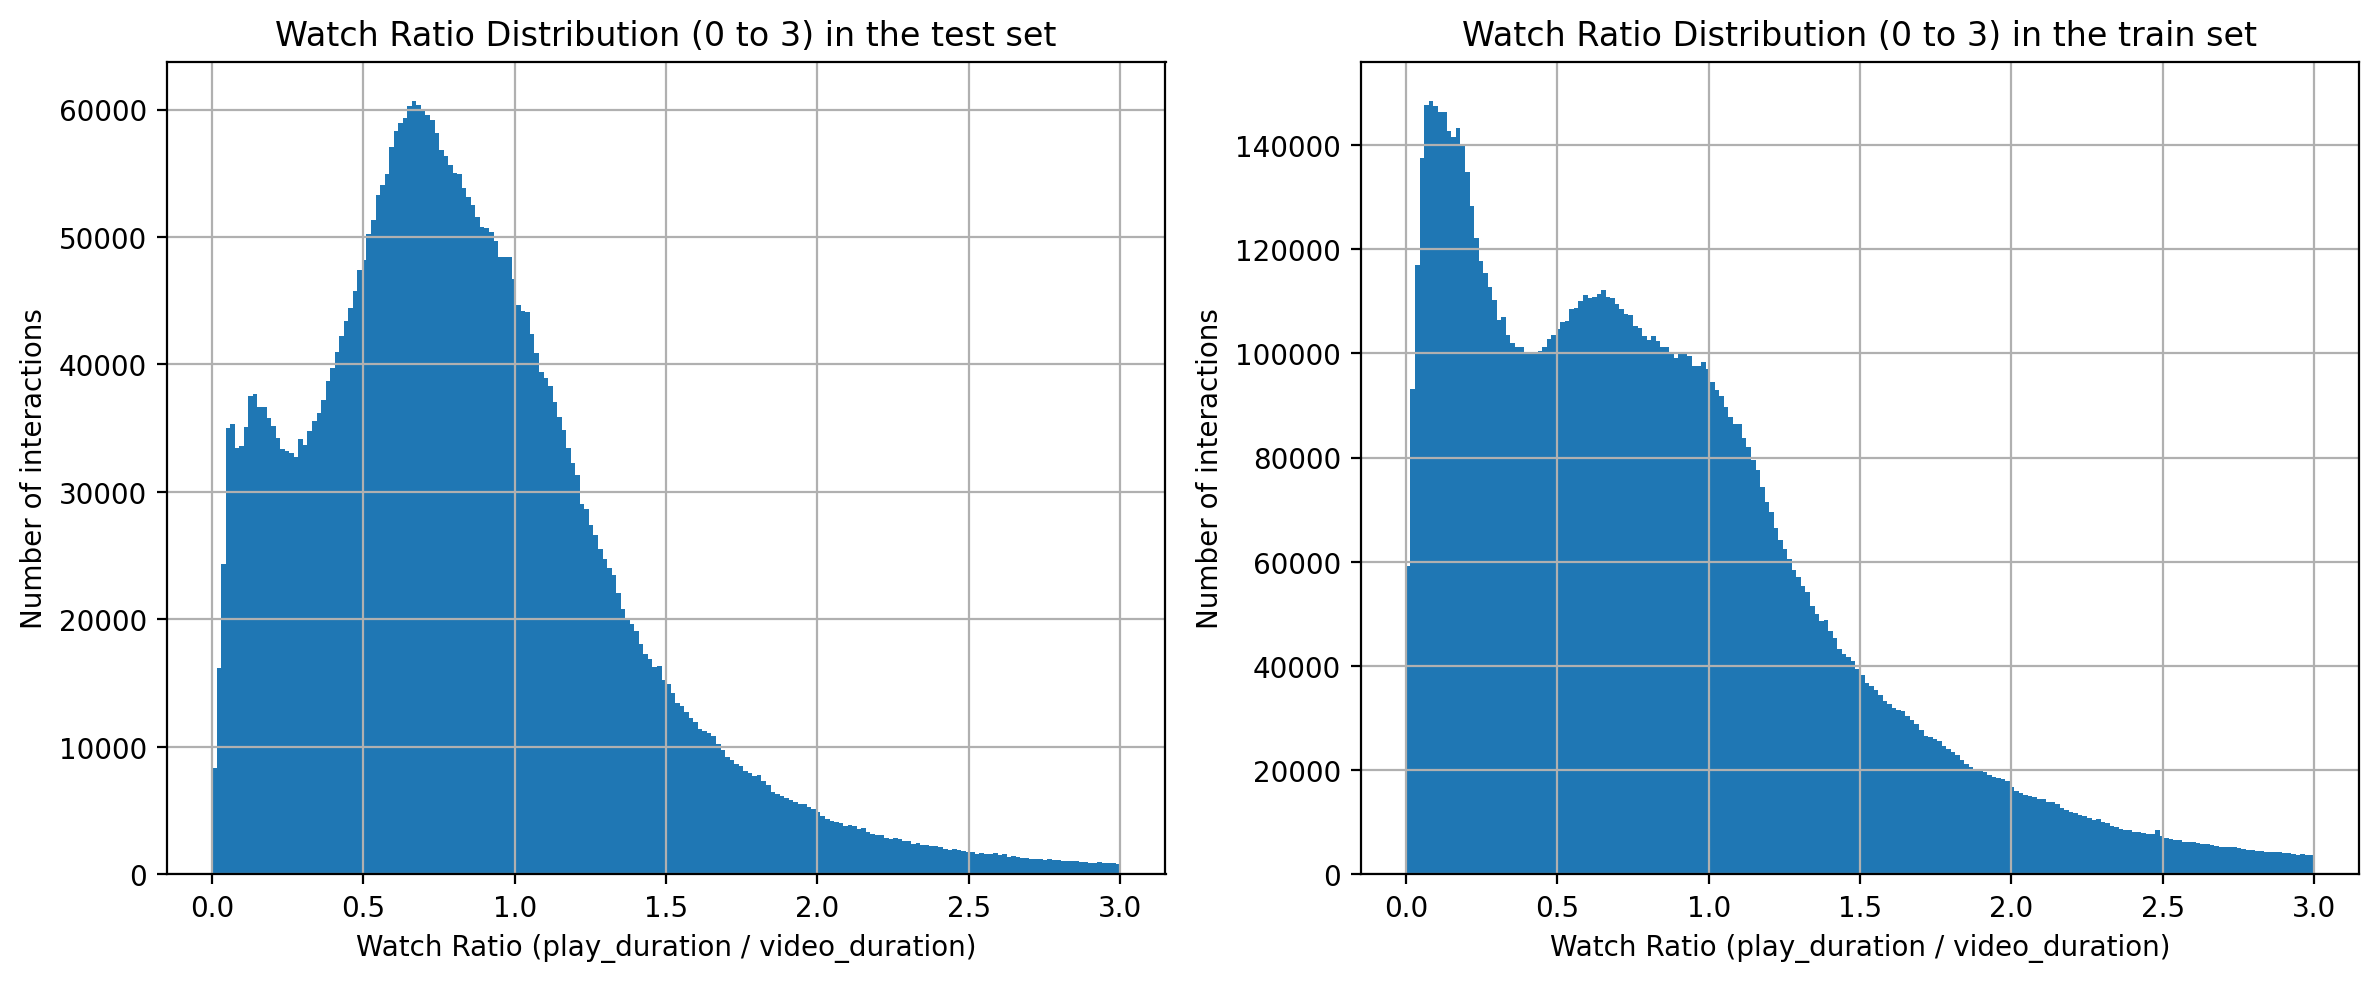

In [25]:
print("Statistics of the watch_ratio")

def plot_watch_ratio_distribution(df, title, range=(0, 3)):
    """Plot the watch ratio distribution for a given DataFrame."""
    plt.hist(df['watch_ratio'], bins=200, range=range)
    plt.title(title)
    plt.xlabel("Watch Ratio (play_duration / video_duration)")
    plt.ylabel("Number of interactions")
    plt.grid(True)

def print_watch_ratio_statistics(df):
    """Print the watch ratio statistics for a given DataFrame."""
    print(df['watch_ratio'].describe().round(2))
    row = df.shape[0]
    thresholds = [3, 5, 10, 50, 100]
    for t in thresholds:
        count = (df['watch_ratio'] > t).sum()
        print(f"Number of interactions with a watch_ratio > {t}: {count} ({count / row:.2%})")


print("Statistics of the watch_ratio")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

print("Train set")
plot_watch_ratio_distribution(df_train, "Watch Ratio Distribution (0 to 3) in the train set")
plt.sca(axs[0])
print_watch_ratio_statistics(df_train)

print("\nTest set")
plot_watch_ratio_distribution(df_test, "Watch Ratio Distribution (0 to 3) in the test set")
plt.sca(axs[1])
print_watch_ratio_statistics(df_test)

plt.tight_layout()
plt.show()

What is the distribution of the interactions per user?

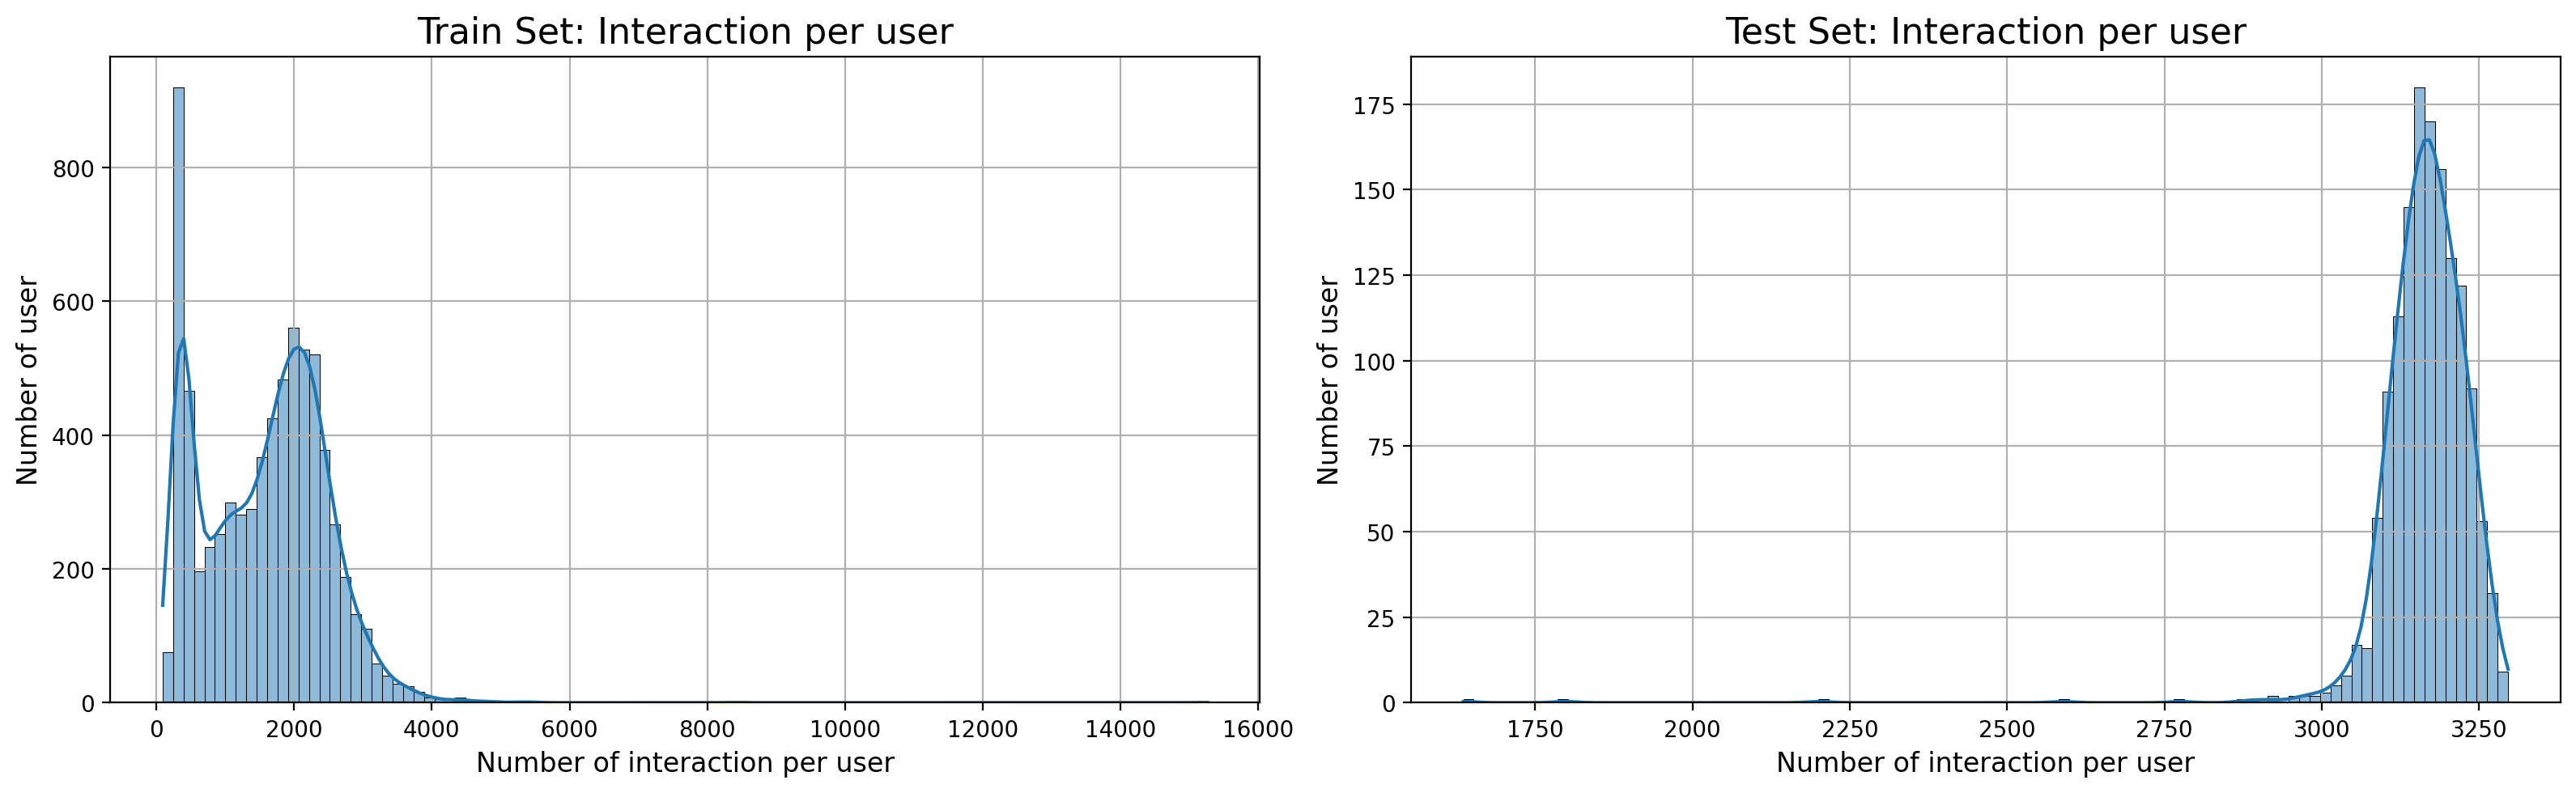

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_train.groupby('user_id')['video_id'].count(), bins=100, kde=True, ax=axs[0])
axs[0].set_title('Train Set: Interaction per user', fontsize=16)
axs[0].set_xlabel("Number of interaction per user", fontsize=12)
axs[0].set_ylabel("Number of user", fontsize=12)
axs[0].grid(True)

sns.histplot(df_test.groupby('user_id')['video_id'].count(), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Test Set: Interaction per user', fontsize=16)
axs[1].set_xlabel("Number of interaction per user", fontsize=12)
axs[1].set_ylabel("Number of user", fontsize=12)
axs[1].grid(True)

plt.tight_layout()

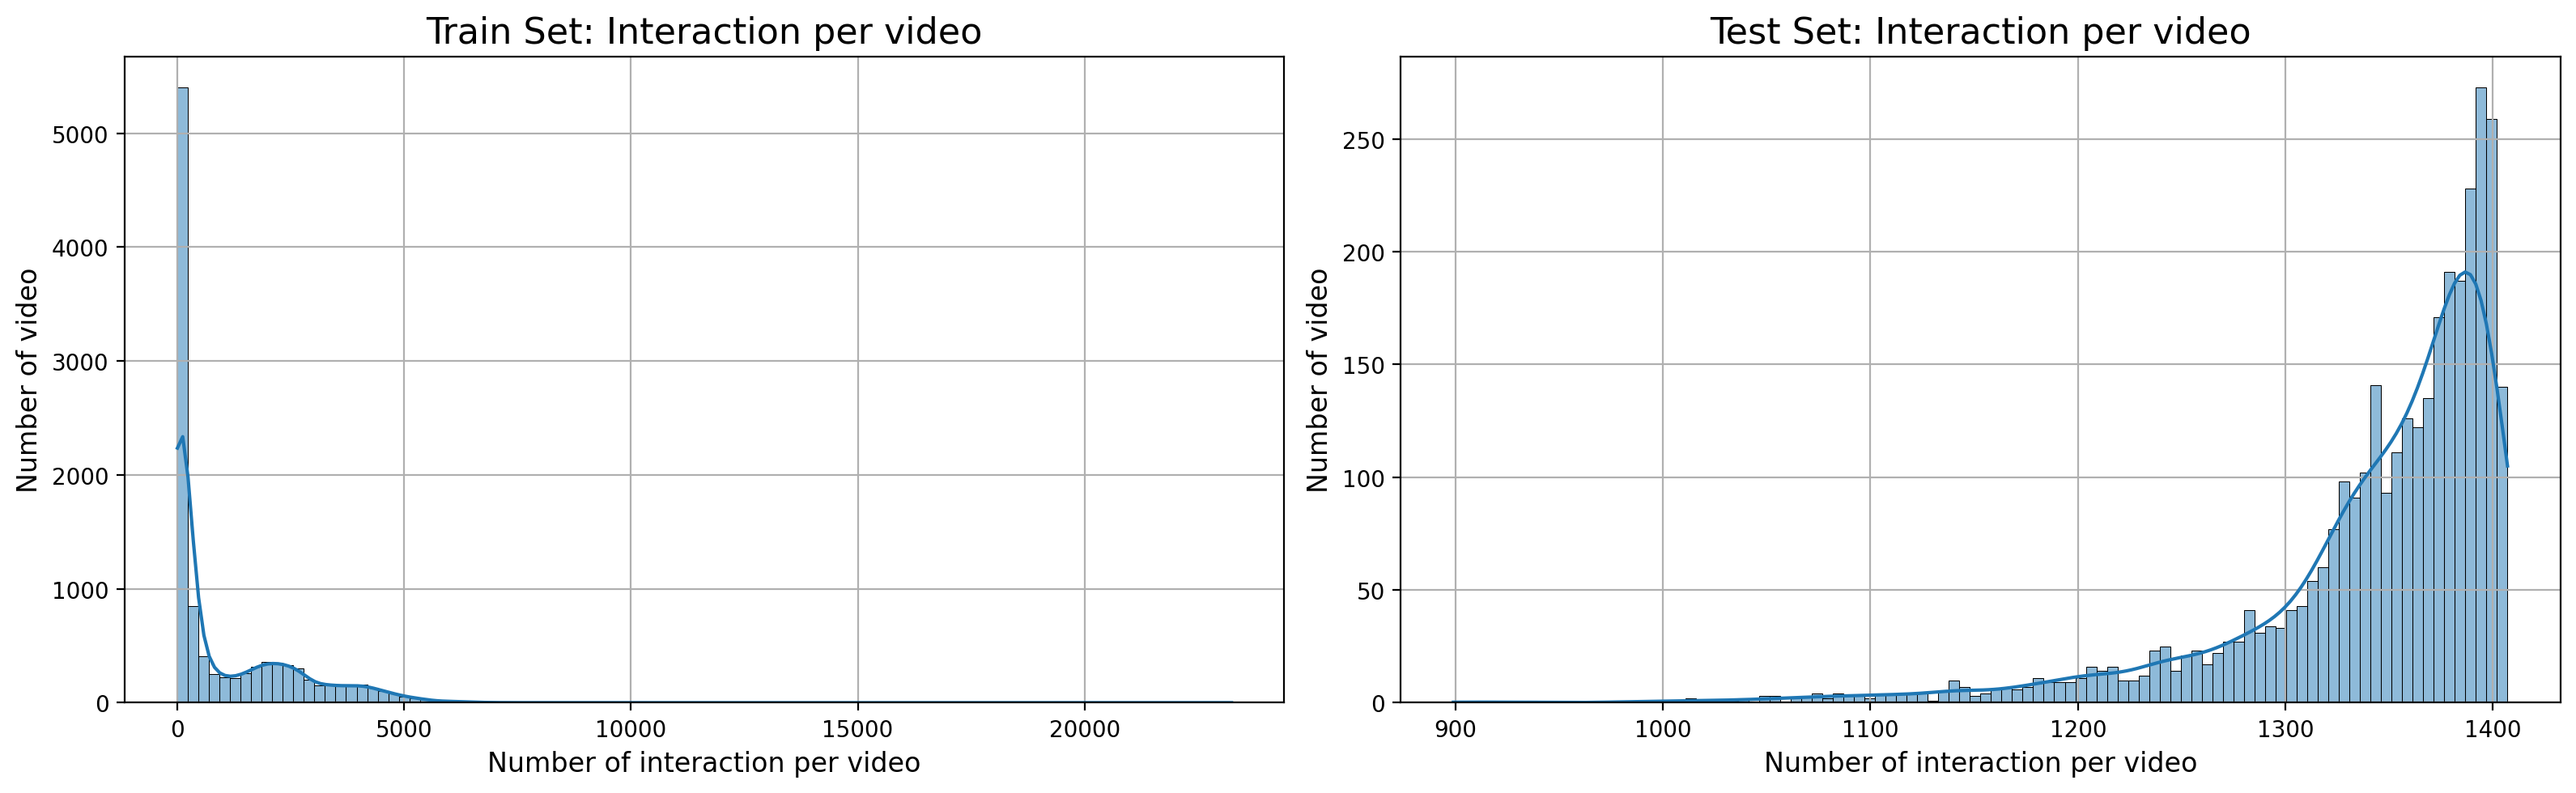

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_train.groupby('video_id')['user_id'].count(), bins=100, kde=True, ax=axs[0])
axs[0].set_title('Train Set: Interaction per video', fontsize=16)
axs[0].set_xlabel("Number of interaction per video", fontsize=12)
axs[0].set_ylabel("Number of video", fontsize=12)
axs[0].grid(True)

sns.histplot(df_test.groupby('video_id')['user_id'].count(), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Test Set: Interaction per video', fontsize=16)
axs[1].set_xlabel("Number of interaction per video", fontsize=12)
axs[1].set_ylabel("Number of video", fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()


Interaction per video duration

Statistics of the play_duration (in seconds)
Train Set:
count    11343019.00
mean           14.56
std            19.81
min             0.14
25%             7.40
50%             9.63
75%            12.12
max           315.07
Name: video_duration_sec, dtype: float64

Test Set:
count    4465531.00
mean          14.23
std           19.90
min            3.07
25%            7.50
50%            9.56
75%           11.83
max          315.07
Name: video_duration_sec, dtype: float64


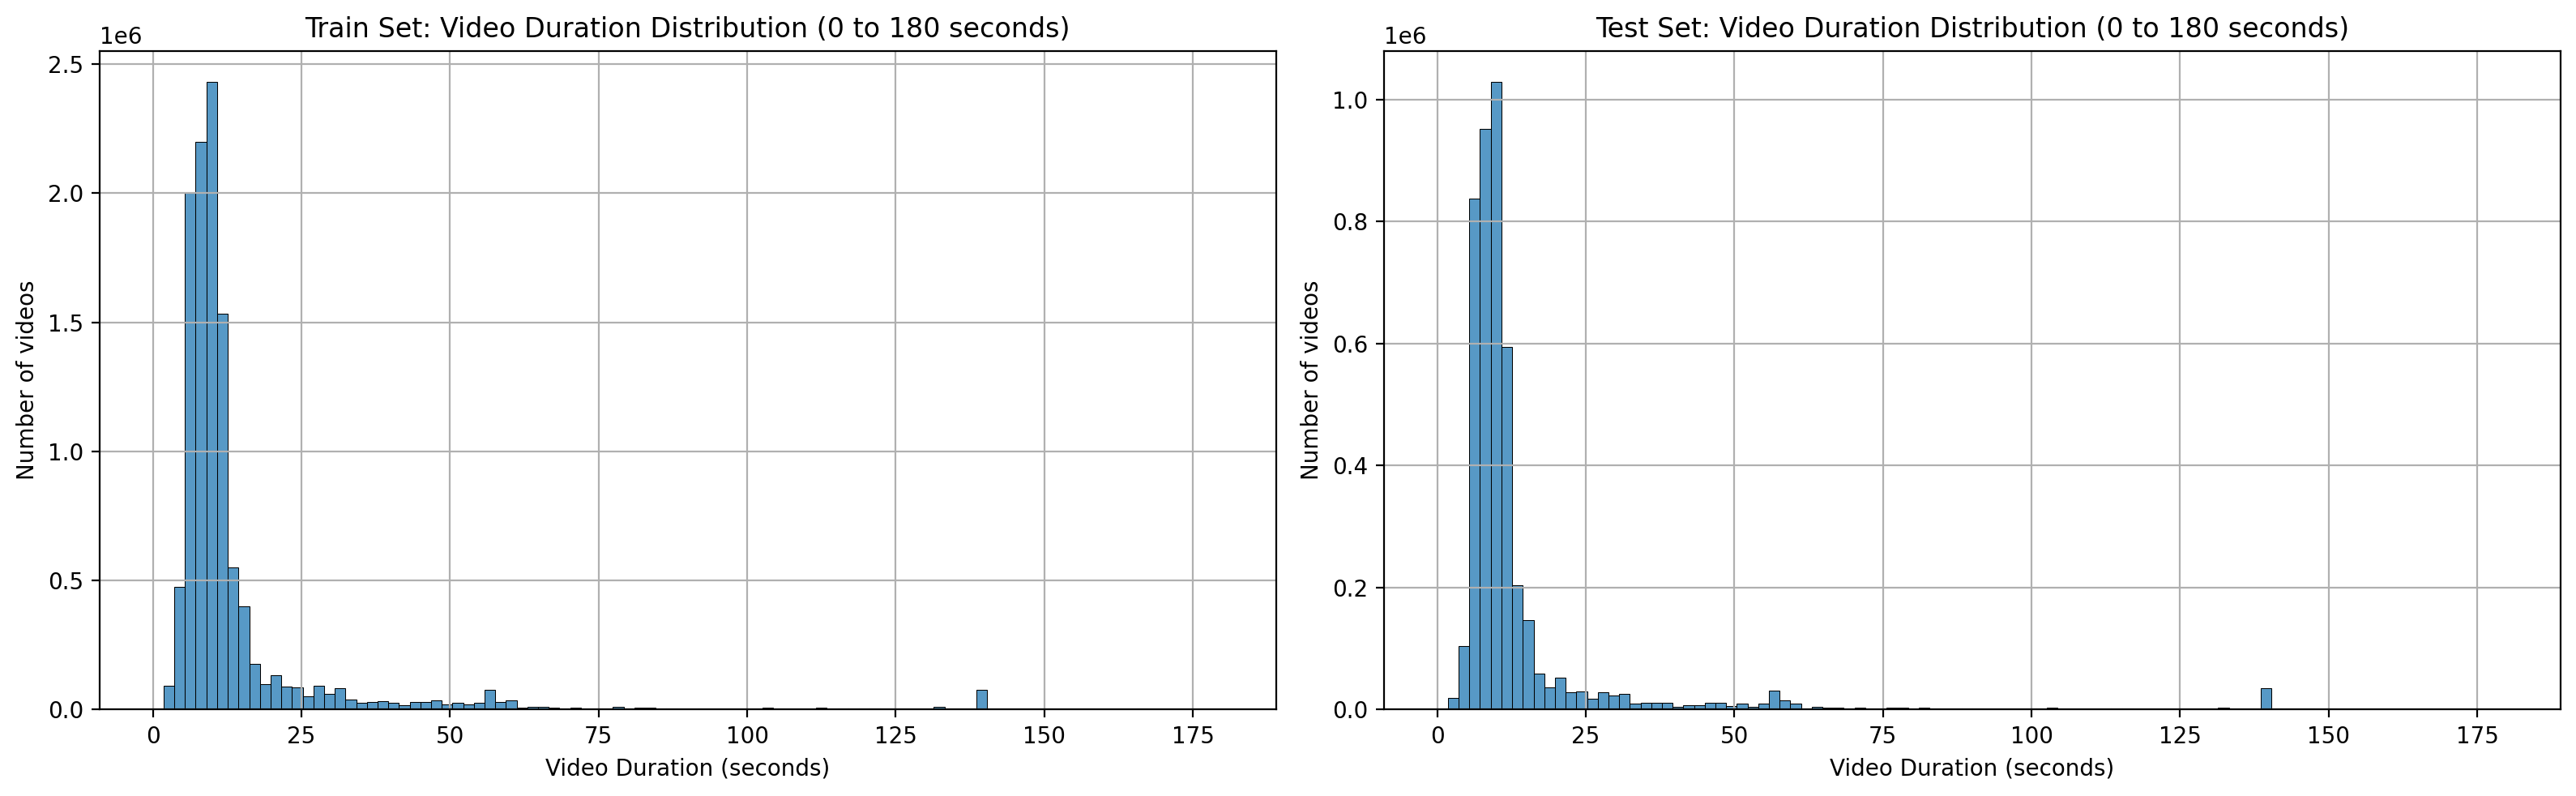

In [28]:
print("Statistics of the play_duration (in seconds)")
df_train['video_duration_sec'] = df_train['video_duration'] / 1000
df_test['video_duration_sec'] = df_test['video_duration'] / 1000

print("Train Set:")
print(df_train['video_duration_sec'].describe().round(2))
print("\nTest Set:")
print(df_test['video_duration_sec'].describe().round(2))

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df_train, x='video_duration_sec', bins=100, binrange=(0, 180), kde=False, ax=axs[0])
axs[0].set_title("Train Set: Video Duration Distribution (0 to 180 seconds)")
axs[0].set_xlabel("Video Duration (seconds)")
axs[0].set_ylabel("Number of videos")
axs[0].grid(True)

sns.histplot(data=df_test, x='video_duration_sec', bins=100, binrange=(0, 180), kde=False, ax=axs[1])
axs[1].set_title("Test Set: Video Duration Distribution (0 to 180 seconds)")
axs[1].set_xlabel("Video Duration (seconds)")
axs[1].set_ylabel("Number of videos")
axs[1].grid(True)

plt.tight_layout()
plt.show()


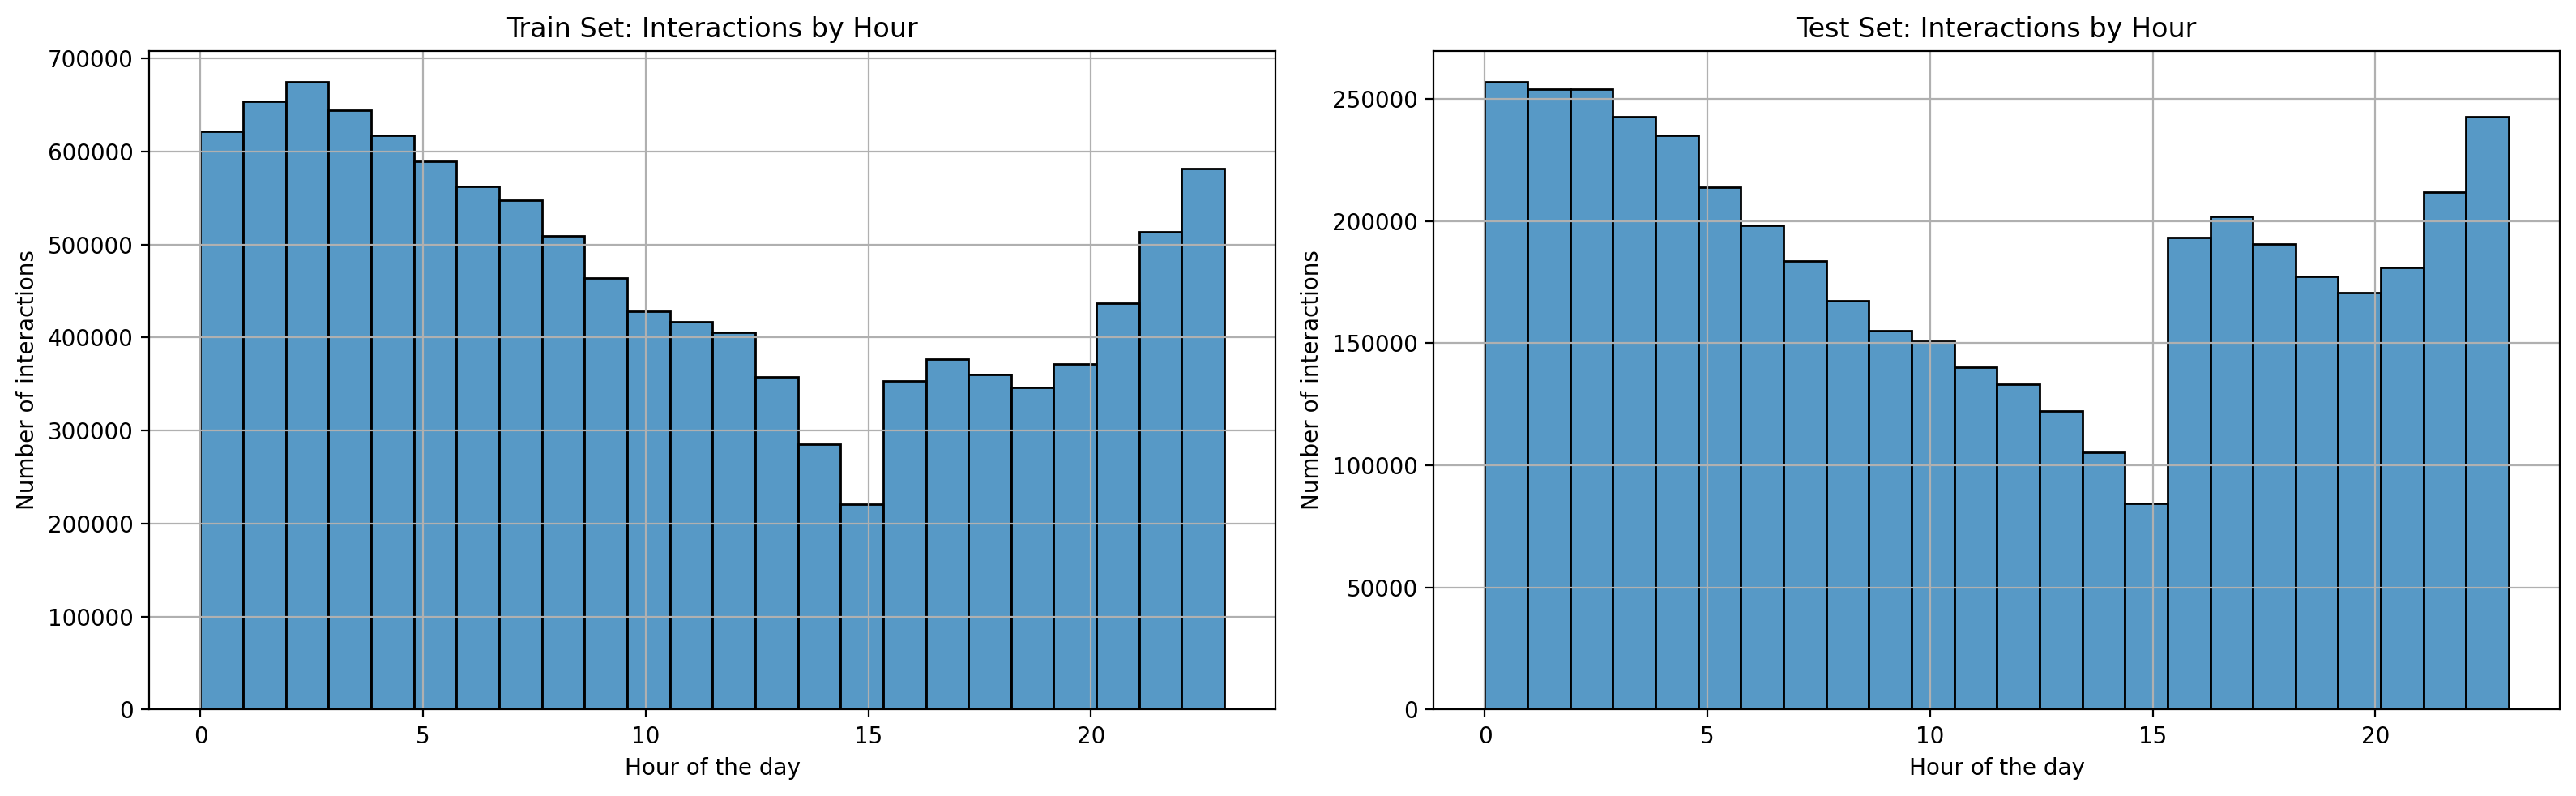

In [29]:
# Plot the distribution of interactions by hour with both datasets
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=df_train, x='hour', bins=24, kde=False, ax=axs[0])
axs[0].set_title("Train Set: Interactions by Hour")
axs[0].set_xlabel("Hour of the day")
axs[0].set_ylabel("Number of interactions")
axs[0].grid(True)
sns.histplot(data=df_test, x='hour', bins=24, kde=False, ax=axs[1])
axs[1].set_title("Test Set: Interactions by Hour")
axs[1].set_xlabel("Hour of the day")
axs[1].set_ylabel("Number of interactions")
axs[1].grid(True)
plt.tight_layout()

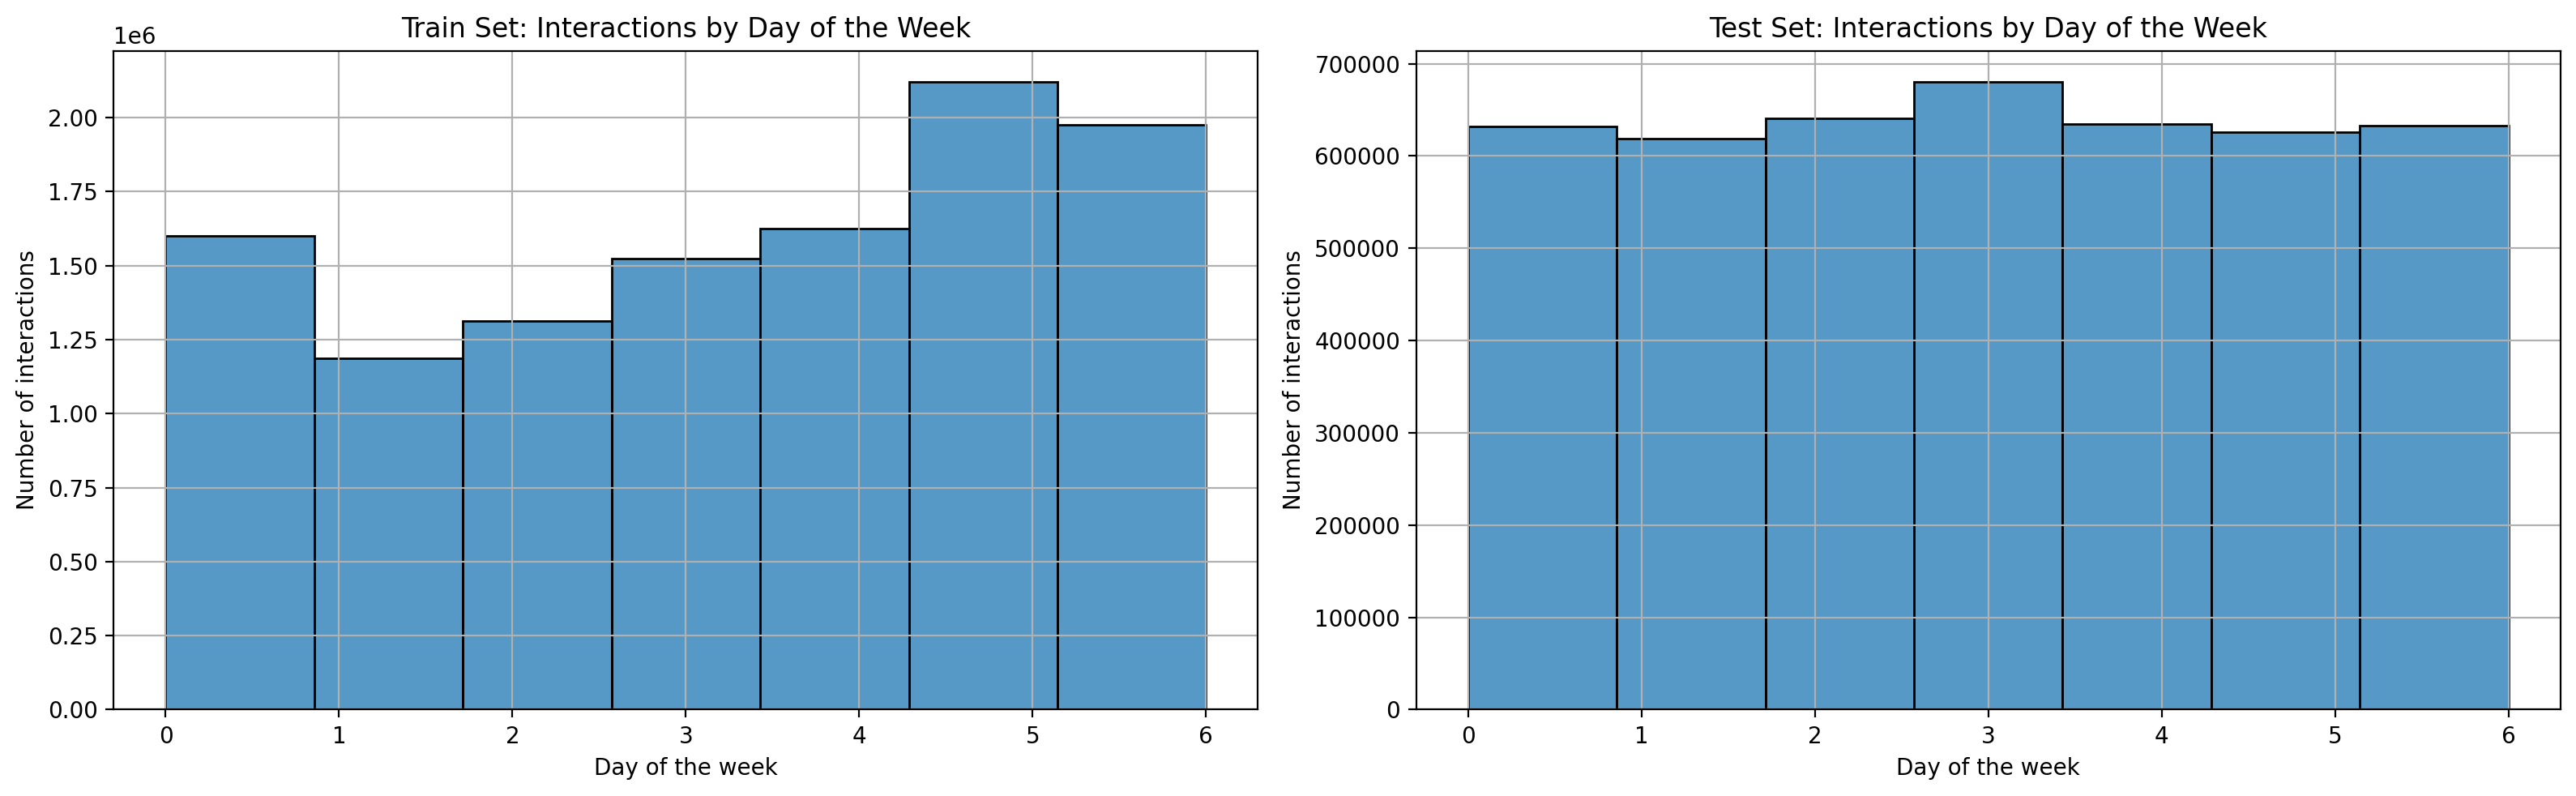

In [30]:
# Plot the distribution of interactions by day of the week with both datasets
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=df_train, x='day', bins=7, kde=False, ax=axs[0])
axs[0].set_title("Train Set: Interactions by Day of the Week")
axs[0].set_xlabel("Day of the week")
axs[0].set_ylabel("Number of interactions")
axs[0].grid(True)
sns.histplot(data=df_test, x='day', bins=7, kde=False, ax=axs[1])
axs[1].set_title("Test Set: Interactions by Day of the Week")
axs[1].set_xlabel("Day of the week")
axs[1].set_ylabel("Number of interactions")
axs[1].grid(True)
plt.tight_layout()

### Difference between small_matrix and big_matrix

| Feature                              | Big Matrix                                      | Small Matrix                                    |
|--------------------------------------|-------------------------------------------------|-------------------------------------------------|
| **Total interactions**              | 12 530 805                                      | 4 494 578                                       |
| **Unique users**                    | 7 176                                           | 1 411                                           |
| **Unique videos**                   | 10 728                                          | 3 327                                           |
| **Average watch ratio**             | ~95% of video watched                           | ~91% of video watched                           |
| **Avg interactions per video**      | 1 078                                           | 1 351                                           |
| **Avg interactions per user**       | 1 612                                           | 3 185                                           |
| **Average video duration**          | 14.56 seconds                                   | 14.22 seconds                                   |
| **Time range**                      | 2020-06-23 02:34:11 → 2020-09-10 01:32:12       | 2020-07-03 20:23:26 → 2020-09-05 17:57:23       |

- Big_matrix has lot of interactions with watch_ratio=0 (250k VS 38k for small_matrix)
  - To be removed => useless (user didn't watch/skip those videos)
- Video duration ~ equivalent

- Big_matrix perfect for training : lot of data + sparse
- Small_matrix perfect for testing : every user has interacted with every video

## Social Network

In [31]:
social_network = pd.read_csv('data/social_network.csv')
print("Social Network")
display(social_network.head())
print(social_network.info())

Social Network


,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      472 non-null    int64 
 1   friend_list  472 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB
None


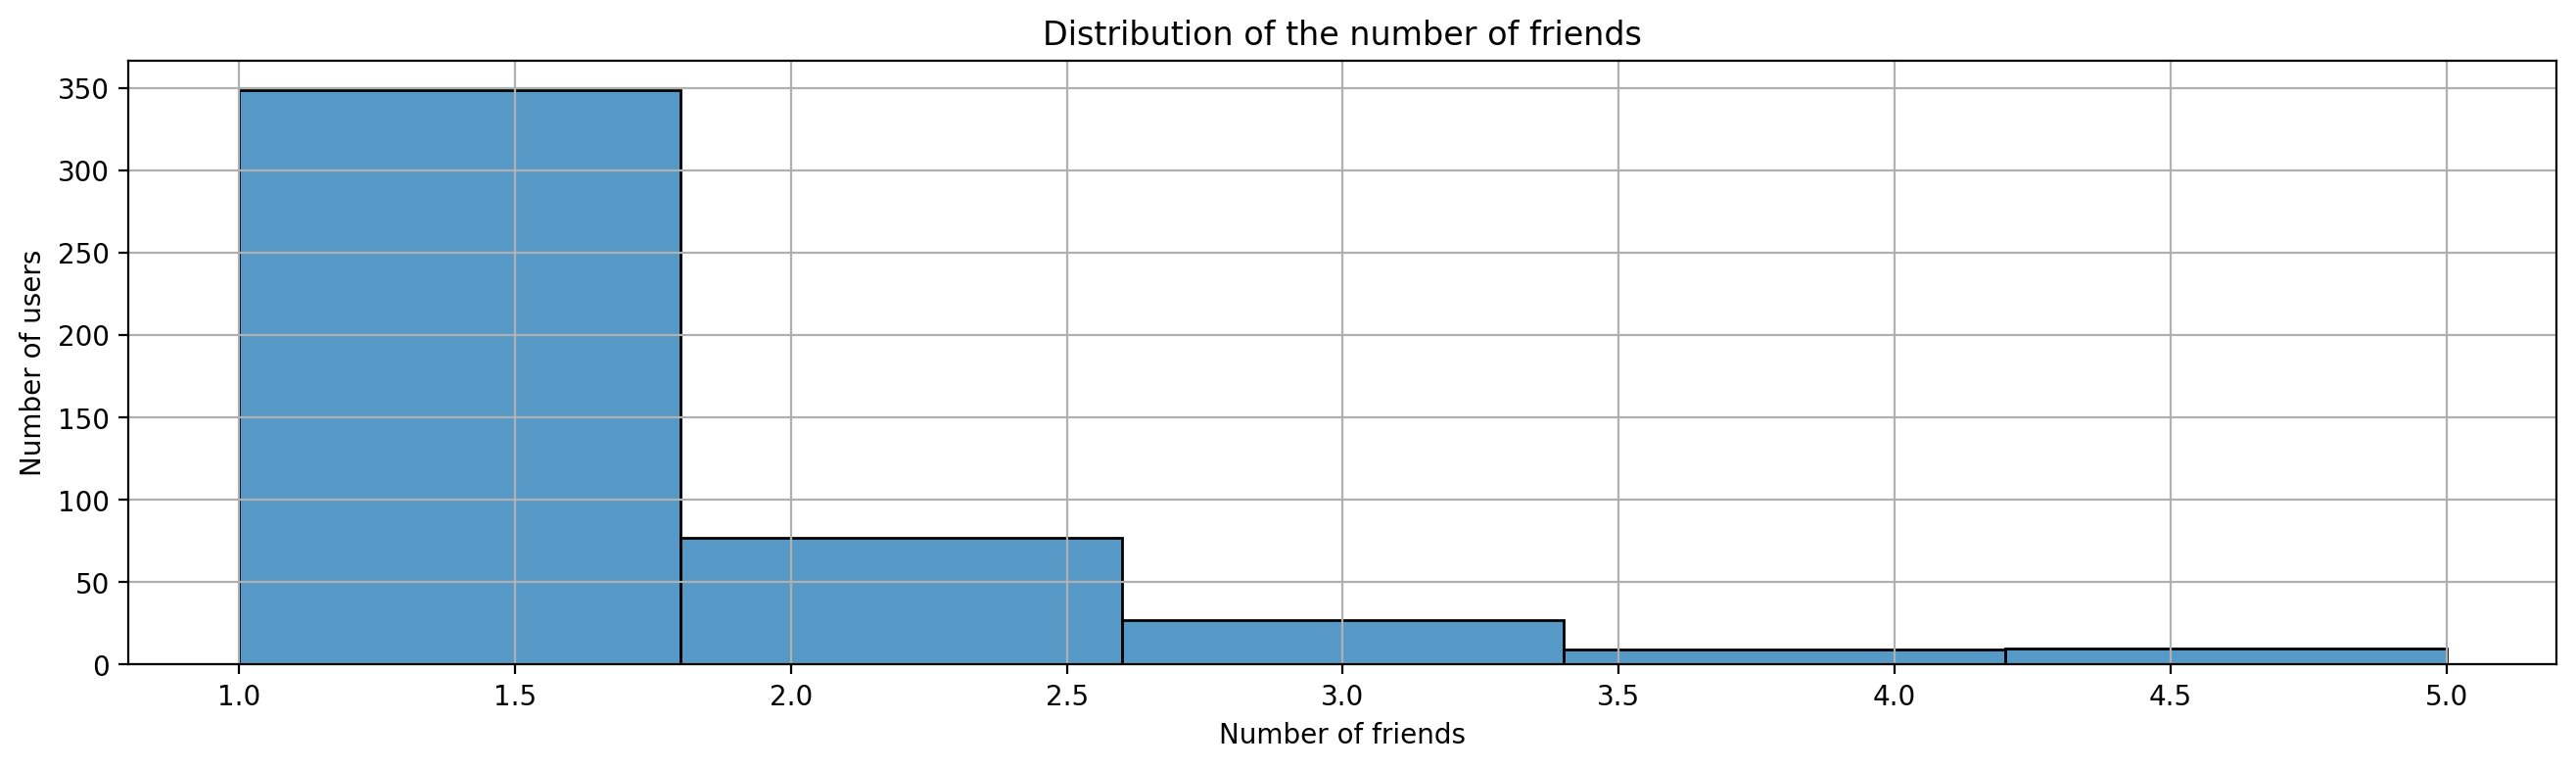

In [32]:
plt.figure(figsize=(16, 4))
social_network['friend_length'] = social_network['friend_list'].apply(lambda x: len(x.split(',')))
sns.histplot(social_network['friend_length'], bins=5)
plt.title("Distribution of the number of friends")
plt.xlabel("Number of friends")
plt.ylabel("Number of users")
plt.grid(True)
plt.show()

# Useless ?

## Item categories

In [33]:
item_categories = pd.read_csv('data/item_categories.csv')
item_categories['feat'] = item_categories['feat'].apply(eval)
print("Item Categories")
display(item_categories.head())
print(item_categories.info())

# How many uniques features
unique_features = set()
for feat_list in item_categories['feat']:
    for feat in feat_list:
        unique_features.add(feat)
print(f"There are {len(unique_features)} unique features in the dataset")
print(unique_features)

Item Categories


,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  10728 non-null  int64 
 1   feat      10728 non-null  object
dtypes: int64(1), object(1)
memory usage: 167.8+ KB
None
There are 31 unique features in the dataset
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}


There are 31 features in the dataset
11: 2027
28: 1360
8: 1112
5: 964
6: 912
9: 696
19: 686
12: 534
7: 503
26: 490
25: 468
1: 463
15: 374
17: 350
20: 265
13: 245
2: 216
16: 214
10: 170
4: 164
18: 131
3: 104
14: 63
23: 39
27: 31
21: 29
0: 24
30: 22
22: 20
24: 12
29: 5


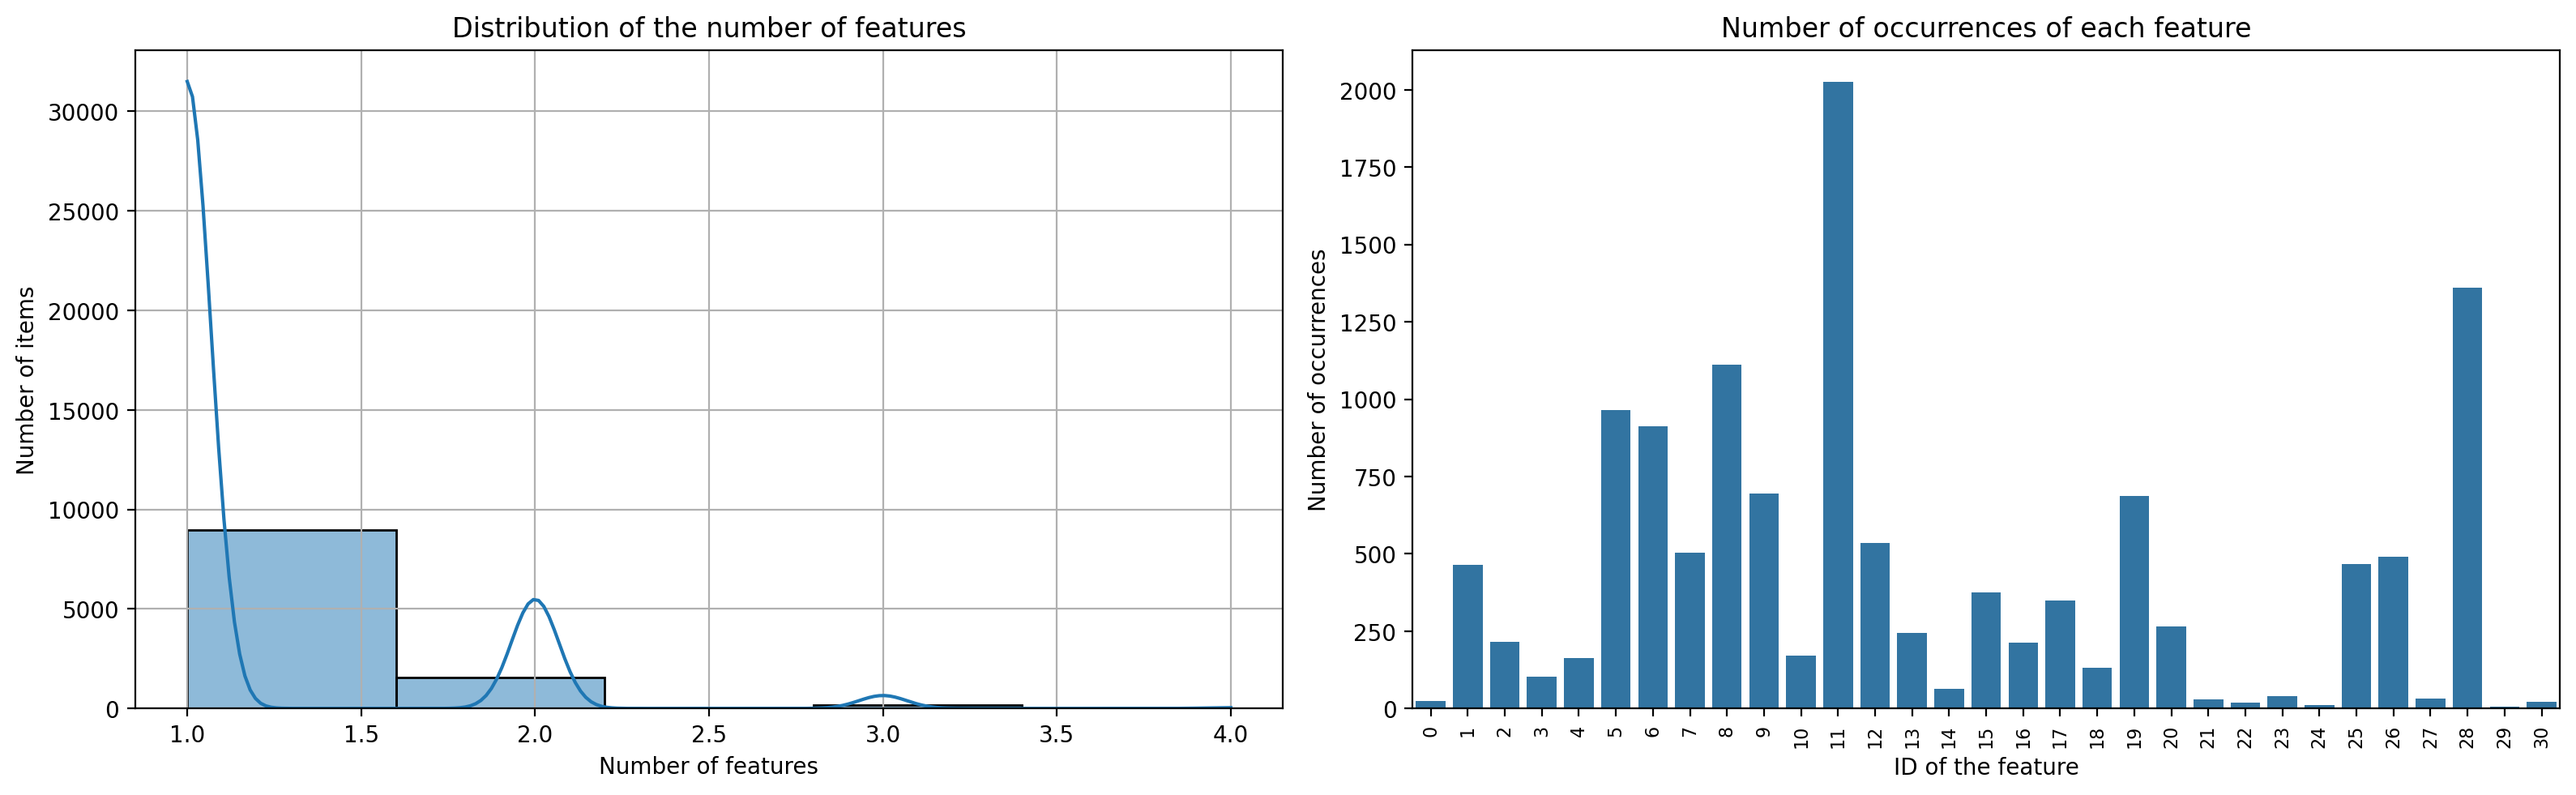

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
# First subplot
item_categories['feat_length'] = item_categories['feat'].apply(lambda x: len(x))
sns.histplot(item_categories['feat_length'], bins=5, kde=True, ax=axs[0])
axs[0].set_title("Distribution of the number of features")
axs[0].set_xlabel("Number of features")
axs[0].set_ylabel("Number of items")
axs[0].grid(True)

# Second subplot (which features are the most frequent)
from collections import Counter

features_count = Counter(feat for feat_list in item_categories['feat'] for feat in feat_list)

features_count = features_count.most_common()

print(f"There are {len(features_count)} features in the dataset")
for feat, count in features_count:
    print(f"{feat}: {count}")

sns.barplot(x=[feat for feat, _ in features_count], y=[count for _, count in features_count], ax=axs[1])
axs[1].tick_params(axis='x', labelrotation=90)

axs[1].tick_params(axis='x', labelsize=8)

axs[1].set_title("Number of occurrences of each feature")
axs[1].set_xlabel("ID of the feature")
axs[1].set_ylabel("Number of occurrences")

plt.tight_layout()
plt.show()

## Item Daily Features

In [35]:
item_daily_features = pd.read_csv('data/item_daily_features.csv')
print("Item Daily Features")
display(item_daily_features.head())
print(item_daily_features.info())

Item Daily Features


,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343341 entries, 0 to 343340
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   video_id                  343341 non-null  int64  
 1   date                      343341 non-null  int64  
 2   author_id                 343341 non-null  int64  
 3   video_type                343341 non-null  object 
 4   upload_dt                 343341 non-null  object 
 5   upload_type               343341 non-null  object 
 6   visible_status            343341 non-null  object 
 7   video_duration            332743 non-null  float64
 8   video_width               343341 non-null  int64  
 9   video_height              343341 non-null  int64  
 10  music_id                  343341 non-null  int64  
 11  video_tag_id              343341 non-null  int64  
 12  video_tag_name            310907 non-null  object 
 13  show_cnt                  343341 non-null  i

In [36]:
# Count values of video_type
video_type_counts = item_daily_features['video_type'].value_counts()
print("Video type counts:")
print(video_type_counts)
print(f"Percentage of AD videos: {video_type_counts['AD'] / item_daily_features.shape[0] * 100:.2f}%")

# Count values of upload_type
upload_type_counts = item_daily_features['upload_type'].value_counts()
print("\nUpload type counts:")
print(upload_type_counts)

# Count values of video_tag_id
video_tag_id_counts = item_daily_features['video_tag_id'].value_counts()
print("\nVideo tag ID counts:")
print(video_tag_id_counts)

# Count values of video_tag_name
video_tag_name_counts = item_daily_features['video_tag_name'].value_counts()
print("\nVideo tag name counts:")
print(video_tag_name_counts)

# isNan in video_tag_name
print(f"\nThere are {item_daily_features['video_tag_name'].isna().sum()} NaN values in video_tag_name")
print(f"Percentage of NaN values in video_tag_name: {item_daily_features['video_tag_name'].isna().sum() / item_daily_features.shape[0] * 100:.2f}%")
print(f"There are {item_daily_features['video_tag_id'].isna().sum()} NaN values in video_tag_id")
print(f"Percentage of NaN values in video_tag_id: {item_daily_features['video_tag_id'].isna().sum() / item_daily_features.shape[0] * 100:.2f}%")

# => We must use video_tag_id instead of video_tag_name in order to avoid NaN values

Video type counts:
NORMAL    342188
AD          1153
Name: video_type, dtype: int64
Percentage of AD videos: 0.34%

Upload type counts:
ShortImport               201962
ShortCamera                50461
Kmovie                     27192
LongImport                 17654
Web                        11077
UNKNOWN                    10135
LongCamera                  5878
AiCutVideo                  5833
LongPicture                 5004
PictureSet                  4957
FollowShoot                 1282
FlashPhoto                   538
ShareFromOtherApp            444
PhotoCopy                    344
SameFrame                    335
PictureCopy                  150
LocalIntelligenceAlbum        54
LocalCollection               41
Name: upload_type, dtype: int64

Video tag ID counts:
0       32434
2624    31043
381      9041
2625     8676
2139     8054
        ...  
1147        1
905         1
2551        1
2481        1
2573        1
Name: video_tag_id, Length: 562, dtype: int64

Video tag name 

In [39]:
# Columns in item_daily_features that have NaN values
nan_columns = item_daily_features.columns[item_daily_features.isna().any()].tolist()
print("Columns with NaN values:")
print(nan_columns)

for col in nan_columns:
    print("=" * 50)
    print(f"{col}: {item_daily_features[col].isna().sum()} NaN values")
    print("=" * 50)
    print(f"Percentage of NaN values in {col}: {item_daily_features[col].isna().sum() / item_daily_features.shape[0] * 100:.2f}%")
    print(f"Values in {col}:\n{item_daily_features[col].unique()}")
    print(f"Values count in {col}:\n{item_daily_features[col].value_counts()}")

Columns with NaN values:
['video_duration', 'video_tag_name', 'collect_cnt', 'collect_user_num', 'cancel_collect_cnt', 'cancel_collect_user_num']
video_duration: 10598 NaN values
Percentage of NaN values in video_duration: 3.09%
Values in video_duration:
[ 5966.    nan  8000. ...  7387. 54720.  5132.]
Values count in video_duration:
11533.0    3567
6000.0     3142
6066.0     1722
6100.0     1460
6033.0     1449
           ... 
15394.0       1
2465.0        1
2250.0        1
738.0         1
5132.0        1
Name: video_duration, Length: 3445, dtype: int64
video_tag_name: 32434 NaN values
Percentage of NaN values in video_tag_name: 9.45%
Values in video_tag_name:
['建筑' '颜值' nan '高新数码' '生活' '搞笑' '树木' '摄影' '卖衣服' '穿搭' '明星' '娱乐' '电影黑条' '情感'
 '正面' '面条' '美食' '自拍脸' '服装店' '截图' '侧面' '海边_沙滩' '运动' '摩托车' '汽车' '天空' '话筒'
 '音乐' '游乐场' '果蔬' '一盘菜' '室内' '瘦身操' '祝福' '人群聚集' '汉服' '二次元' '镜子' '穿戴' '操场'
 '舞蹈' '女青年' '壮年男' '男青年' '听书' '资讯' '婚礼' '减肥' '穿衣秀' '国外' '亲子' '手势舞' '眼妆'
 '美妆' '动漫' '球类运动' '日出_日落' '绘画' '才艺' '床' '

In [41]:
def clean_item_daily_features(df):
    # Fill values with most common values if NaN
    if df['video_duration'].isna().sum() > 0:
        most_common_duration = df['video_duration'].mode()[0]
        df['video_duration'] = df['video_duration'].fillna(most_common_duration)

    # Fill values with UNKNOWN if NaN
    if df['video_tag_name'].isna().sum() > 0:
        df['video_tag_name'] = df['video_tag_name'].fillna('UNKNOWN')

    # Fill values with 0.0 if NaN
    collect_cols = [
        'collect_cnt', 'collect_user_num',
        'cancel_collect_cnt', 'cancel_collect_user_num'
    ]
    for col in collect_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(0.0)

    return df

item_daily_features = clean_item_daily_features(item_daily_features)
print("Item Daily Features after cleaning")
display(item_daily_features.head())
print(item_daily_features.info())

nan_columns = item_daily_features.columns[item_daily_features.isna().any()].tolist()
print("Columns with NaN values:")
print(nan_columns)

for col in nan_columns:
    print("=" * 50)
    print(f"{col}: {item_daily_features[col].isna().sum()} NaN values")
    print("=" * 50)
    print(f"Percentage of NaN values in {col}: {item_daily_features[col].isna().sum() / item_daily_features.shape[0] * 100:.2f}%")
    print(f"Values in {col}: {item_daily_features[col].unique()}")
    print(f"Values count in {col}: {item_daily_features[col].value_counts()}")

Item Daily Features after cleaning


,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,0.0,0.0,0.0,0.0
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,0.0,0.0,0.0,0.0
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,0.0,0.0,0.0,0.0
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,0.0,0.0,0.0,0.0
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343341 entries, 0 to 343340
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   video_id                  343341 non-null  int64  
 1   date                      343341 non-null  int64  
 2   author_id                 343341 non-null  int64  
 3   video_type                343341 non-null  object 
 4   upload_dt                 343341 non-null  object 
 5   upload_type               343341 non-null  object 
 6   visible_status            343341 non-null  object 
 7   video_duration            343341 non-null  float64
 8   video_width               343341 non-null  int64  
 9   video_height              343341 non-null  int64  
 10  music_id                  343341 non-null  int64  
 11  video_tag_id              343341 non-null  int64  
 12  video_tag_name            343341 non-null  object 
 13  show_cnt                  343341 non-null  i

## KuaiRec Caption Category

In [42]:
caption_categories = pd.read_csv('data/kuairec_caption_category.csv')
caption_categories.dropna(inplace=True)

print("Caption Categories")
display(caption_categories.head())
print(caption_categories.info())

Caption Categories


,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后;运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇;惊艳不了时光;温柔不了岁月;我只想漫无目的的走走;努力发笔小财;给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装
5,5,UNKNOWN,“你们吵的越狠 他们的手就握的越紧” #文轩 #刘耀文 #宋亚轩 #顾子璇...,"[刘耀文,宋亚轩,文轩,顾子璇是樱桃吖,顾子璇超级喜欢文轩]",6.0,明星娱乐,667.0,娱乐八卦,2375.0,饭制


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9369 entries, 0 to 10731
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   video_id                    9369 non-null   object 
 1   manual_cover_text           9369 non-null   object 
 2   caption                     9369 non-null   object 
 3   topic_tag                   9369 non-null   object 
 4   first_level_category_id     9369 non-null   float64
 5   first_level_category_name   9369 non-null   object 
 6   second_level_category_id    9369 non-null   float64
 7   second_level_category_name  9369 non-null   object 
 8   third_level_category_id     9369 non-null   float64
 9   third_level_category_name   9369 non-null   object 
dtypes: float64(3), object(7)
memory usage: 805.1+ KB
None


#### Stats per column

In [43]:
# Percent of UNKNOWN in manual_cover_text
unknown_count = caption_categories['manual_cover_text'].str.contains('UNKNOWN').sum()
print(f"Percent of UNKNOWN in manual_cover_text: {unknown_count / caption_categories.shape[0] * 100:.2f}%") # Can be removed

## -> manual_cover_text is not useful

Percent of UNKNOWN in manual_cover_text: 60.86%


#### Parse topic_tags

In [44]:
import re

def extract_tags(tag_str):
    if not isinstance(tag_str, str) or tag_str.strip() in ['[]', '', 'nan']:
        return []
    tag_str = tag_str.strip("[]")
    tags = tag_str.split(',')
    return [t.strip().strip('"').strip("'") for t in tags if t.strip()]

caption_categories['parsed_tags'] = caption_categories['topic_tag'].apply(extract_tags)
caption_categories['n_tags'] = caption_categories['parsed_tags'].apply(len)

display(caption_categories[['topic_tag', 'parsed_tags', 'n_tags']].head(10))

# Count values of parse_tags
tags_count = Counter(tag for tag_list in caption_categories['parsed_tags'] for tag in tag_list)


tags_count = tags_count.most_common()
print(f"There are {len(tags_count)} tags in the dataset")
for tag, count in tags_count:
    print(f"{tag}: {count}")

# topic_tag random ?


,topic_tag,parsed_tags,n_tags
0,[],[],0
2,[],[],0
3,[],[],0
4,"[五爱市场,感谢快手我要上热门,搞笑]","[五爱市场, 感谢快手我要上热门, 搞笑]",3
5,"[刘耀文,宋亚轩,文轩,顾子璇是樱桃吖,顾子璇超级喜欢文轩]","[刘耀文, 宋亚轩, 文轩, 顾子璇是樱桃吖, 顾子璇超级喜欢文轩]",5
6,[],[],0
7,[灵魂属性大揭秘],[灵魂属性大揭秘],1
8,"[感谢快手官大大送上热门,感谢推广小助手,感谢推广小助手助我上热门,看得起农村人的点个双击吧]","[感谢快手官大大送上热门, 感谢推广小助手, 感谢推广小助手助我上热门, 看得起农村人的点个...",4
10,"[作品推广,商家号战疫行动,感谢快手我要上热门]","[作品推广, 商家号战疫行动, 感谢快手我要上热门]",3
11,[],[],0


There are 6057 tags in the dataset
感谢快手我要上热门: 975
作品推广: 824
快手创作者服务中心: 490
感谢快手官大大送上热门: 417
主播中心: 369
快手创作者中心: 347
热门: 260
支持快手传播正能量: 254
同城热点: 237
感谢官方大大给的每一次热门: 233
用快影上热门: 225
推广小助手: 170
爱官方爱热门: 163
感谢快手平台: 140
高清视频: 134
今天拍点啥: 121
智能推广: 107
今日份的自拍: 101
感谢快手绿色平台: 101
搞笑: 89
我要上热门: 80
服饰宠粉节: 80
快手全面屏: 74
热爱快手热爱官方我要上热门: 73
快手创业用商家号: 72
快手创作者激励计划: 71
秋上新: 67
感谢快手平台传播正能量: 65
推广助力计划: 62
申请热门: 60
作品推广小助手: 55
明星: 54
快手创作者学院: 54
快手九周年: 48
美食: 48
变瘦变美变好看: 47
真人真事: 45
感谢推广小助手: 43
感谢官方感谢关注感谢老铁们的支持: 43
健康养生: 43
此作品申请热门: 43
正能量: 43
健身打卡: 41
文字视频: 40
商家号战疫行动: 39
文字控: 38
快手小助手: 37
情感语录: 37
一键出片: 36
家有萌宝: 36
跟着快手去旅行: 35
时尚穿搭: 34
情感: 34
短视频带货王: 33
快手宠物天团: 33
街拍: 31
宝宝成长记: 29
传递正能量: 29
爱生活爱官方爱热门: 28
穿搭: 28
商家号邀新赚流量: 28
健身: 27
作品推广扶新: 27
2020高考季: 27
小小喵: 27
搞笑视频: 26
同城热门: 26
生活小妙招: 26
文案: 26
感谢快手绿色平台支持正能量: 26
每日穿搭: 26
一甜相机: 25
每日穿搭分享: 25
宠物达人创作营: 24
健康科普在快手: 24
我是吃货: 23
好物分享: 23
服装搭配: 23
超级段子手计划: 23
记录生活: 23
原相机: 22
健康: 22
手写: 22
篮球: 22
时尚助推官: 22
全民测评季: 21
萌宠: 20
感谢快手我要上热门感谢官方大大: 20
舞蹈: 20
换背景: 20
高考:

In [46]:
# Dict {id: name} of category
level_category_id_to_name = dict()
for i, row in caption_categories.iterrows():
    level_category_id_to_name[int(row['first_level_category_id'])] = row['first_level_category_name'] 
    level_category_id_to_name[int(row['second_level_category_id'])] = row['second_level_category_name']
    level_category_id_to_name[int(row['third_level_category_id'])] = row['third_level_category_name']

first_level_not_unknown = caption_categories[caption_categories['first_level_category_id'] != -124].copy()
first_level_unkown = caption_categories[caption_categories['first_level_category_id'] == -124].copy()
print(f"Percent of first_level_category_id not empty: {first_level_not_unknown.shape[0] / caption_categories.shape[0] * 100:.2f}%")
print(f"Videos that does not have a first level category: {caption_categories[caption_categories['first_level_category_id'] == -124].shape[0]}")
display(first_level_unkown.head(5))

print(f"There are {len(level_category_id_to_name)} custom tag (created by user?) in the dataset (first_level, second_level, third_level)")
# print("Level category ID to name:")
# level_category_id_to_name = dict(sorted(level_category_id_to_name.items(), key=lambda item: item[0]))
# for id, name in level_category_id_to_name.items():
#     print(f"{id}: {name}")

custom_tag_frequency = Counter()
for i, row in caption_categories.iterrows():
    for tag in row['parsed_tags']:
        custom_tag_frequency[tag] += 1

print(f"\nThere are {len(custom_tag_frequency)} custom tag (created by user?) in the dataset (topic_tags)")
# print("Custom tag frequency:")
# custom_tag_frequency = dict(sorted(custom_tag_frequency.items(), key=lambda item: item[1], reverse=True))
# for tag, count in custom_tag_frequency.items():
#     print(f"{tag}: {count}")

# Choice : use tags by users or by the platform ?
## -> tags by the platform
## Easiest : use level_category
## Intermediate : use topic_tag
## Hardest : use caption

Percent of first_level_category_id not empty: 99.63%
Videos that does not have a first level category: 35


,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name,parsed_tags,n_tags
862,862,UNKNOWN,#支持快手传播正能量#感谢快手我要上热门#商家号邀新赚流量#快手创作者中心#主播中心,"[主播中心,商家号邀新赚流量,支持快手传播正能量]",-124.0,UNKNOWN,-124.0,UNKNOWN,-124.0,UNKNOWN,"[主播中心, 商家号邀新赚流量, 支持快手传播正能量]",3
1246,1246,UNKNOWN,来了❤️ @离安(O1970045269) @离安(O1970045269) @大小姐/...,[],-124.0,UNKNOWN,-124.0,UNKNOWN,-124.0,UNKNOWN,[],0
1309,1309,黑熊加入野餐,美国马里兰州一家庭野餐时遇到一只黑熊加入;主动喂其花生酱三明治。,[],-124.0,UNKNOWN,-124.0,UNKNOWN,-124.0,UNKNOWN,[],0
1518,1517,不怕落灰了,#全民测评季,[全民测评季],-124.0,UNKNOWN,-124.0,UNKNOWN,-124.0,UNKNOWN,[全民测评季],1
1595,1594,心念已久的事情终于完成了;,终于不用在惦记了,[],-124.0,UNKNOWN,-124.0,UNKNOWN,-124.0,UNKNOWN,[],0


There are 392 custom tag (created by user?) in the dataset (first_level, second_level, third_level)

There are 6057 custom tag (created by user?) in the dataset (topic_tags)


In [47]:
# Columns with NaN values
nan_columns = caption_categories.columns[caption_categories.isna().any()].tolist()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
[]


## User Features

In [48]:
user_features = pd.read_csv('data/user_features.csv')
print("User Features")
display(user_features.head())
print(user_features.info())

User Features


,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                7176 non-null   int64  
 1   user_active_degree     7176 non-null   object 
 2   is_lowactive_period    7176 non-null   int64  
 3   is_live_streamer       7176 non-null   int64  
 4   is_video_author        7176 non-null   int64  
 5   follow_user_num        7176 non-null   int64  
 6   follow_user_num_range  7176 non-null   object 
 7   fans_user_num          7176 non-null   int64  
 8   fans_user_num_range    7176 non-null   object 
 9   friend_user_num        7176 non-null   int64  
 10  friend_user_num_range  7176 non-null   object 
 11  register_days          7176 non-null   int64  
 12  register_days_range    7176 non-null   object 
 13  onehot_feat0           7176 non-null   int64  
 14  onehot_feat1           7176 non-null   int64  
 15  oneh

#### Stats on columns

In [54]:
print(user_features['user_active_degree'].value_counts())
unknown_count = user_features[user_features['user_active_degree'] == "UNKNOWN"].shape[0]
print(f"Percent of UNKNOWN in user_active_degree: {unknown_count / user_features.shape[0] * 100:.2f}%")
print(f"Is thre NaN value in user_features ? {user_features.isna().sum().sum()}")

# Print which columns have NaN values
nan_columns = user_features.columns[user_features.isna().any()].tolist()
print("Columns with NaN values:")
for col in nan_columns:
    print(f"{col}: {user_features[col].isna().sum()} NaN values")

print(f"Is there a NaN value in user_features ? {user_features.isna().sum().sum()}")
# Uniques values in onehot_featX
# for onehot in user_features.columns:
    # if onehot.startswith('onehot_feat'):
    #     Count unique values
    #     print(f"{onehot}: {user_features[onehot].unique()} unique values")
    #     # Value counts
    #     print(user_features[onehot].value_counts())

full_active      6092
high_active       938
UNKNOWN           118
middle_active      28
Name: user_active_degree, dtype: int64
Percent of UNKNOWN in user_active_degree: 1.64%
Is thre NaN value in user_features ? 650
Columns with NaN values:
onehot_feat4: 201 NaN values
onehot_feat12: 77 NaN values
onehot_feat13: 75 NaN values
onehot_feat14: 75 NaN values
onehot_feat15: 74 NaN values
onehot_feat16: 74 NaN values
onehot_feat17: 74 NaN values
Is there a NaN value in user_features ? 650


In [56]:
import pandas as pd

def clean_user_features(df):
    # Boolean columns or categorical columns
    bool_cols = [col for col in df.columns if df[col].dropna().unique().tolist() == [0.0, 1.0] or df[col].dropna().unique().tolist() == [1.0, 0.0]]
    cat_cols = [col for col in df.columns if col.startswith('onehot_feat') and col not in bool_cols]
    
   # Fill with 0.0 for boolean columns
    for col in bool_cols:
        df[col] = df[col].fillna(0.0)
    
    # Fill with mode for categorical columns
    for col in cat_cols:
        if df[col].isna().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)

    # Fill with mode for other columns
    other_cols = [col for col in df.columns if col not in bool_cols + cat_cols]
    for col in other_cols:
        if df[col].isna().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
    
    return df

# Clean the user features DataFrame
user_features = clean_user_features(user_features)
# print("User features after cleaning:")
# print(user_features.info())
# print(user_features.head())
# print(user_features.describe())

# Print which columns have NaN values
nan_columns = user_features.columns[user_features.isna().any()].tolist()
print("Columns with NaN values:")
for col in nan_columns:
    print(f"{col}: {user_features[col].isna().sum()} NaN values")

print(f"Is there a NaN value in user_features ? {user_features.isna().sum().sum()}")
# Uniques values in onehot_featX
# for onehot in user_features.columns:
#     if onehot.startswith('onehot_feat'):
#         print(f"{onehot}: {user_features[onehot].unique()} unique values")
#         # Value counts
#         print(user_features[onehot].value_counts())

Columns with NaN values:
Is there a NaN value in user_features ? 0


# Feature Engineering

User features :
- user_id
- user_active_degree
- register_days

Item features :
- video_id
- video_duration
- video_tag_id
- like_cnt, comment_cnt
- first_level_category_name
- caption/topic_tag

Interaction features :
- watch_ratio
- timestamp
- day
- hour
- play_duration, video_duration

# Models implementation


## Import & Preprocess

In [2]:
import pandas as pd

# Import
df_train = pd.read_csv('data/big_matrix.csv')
df_test = pd.read_csv('data/small_matrix.csv')
user_features = pd.read_csv('data/user_features.csv')
item_daily_features = pd.read_csv('data/item_daily_features.csv')
kuairec_caption_category = pd.read_csv('data/kuairec_caption_category.csv')
# social_network = pd.read_csv('data/social_network.csv')
item_categories = pd.read_csv('data/item_categories.csv')

# Preprocess
def preprocess_interactions_df(df):
    # Remove rows with NaN values
    df = df.dropna()
    # Remove duplicates
    df = df.drop_duplicates()
    # Remove rows with negative timestamp
    df = df[df['timestamp'] >= 0]
    # Remove watch_ratio = 0 : bug ?
    df = df[df['watch_ratio'] > 0]
    # Convert object to datetime
    df['time'] = pd.to_datetime(df['time'])
    # Convert timestamp to datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"].fillna(0), unit="s")
    # Create a new column with the hour, dayofweek
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.dayofweek
    return df

def clean_user_features(df):
    # Boolean columns or categorical columns
    bool_cols = [col for col in df.columns if df[col].dropna().unique().tolist() == [0.0, 1.0] or df[col].dropna().unique().tolist() == [1.0, 0.0]]
    cat_cols = [col for col in df.columns if col.startswith('onehot_feat') and col not in bool_cols]
    
   # Fill with 0.0 for boolean columns
    for col in bool_cols:
        df[col] = df[col].fillna(0.0)
    
    # Fill with mode for categorical columns
    for col in cat_cols:
        if df[col].isna().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)

    # Fill with mode for other columns
    other_cols = [col for col in df.columns if col not in bool_cols + cat_cols]
    for col in other_cols:
        if df[col].isna().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
    
    return df

def clean_item_daily_features(df):
    # Fill values with most common values if NaN
    if df['video_duration'].isna().sum() > 0:
        most_common_duration = df['video_duration'].mode()[0]
        df['video_duration'] = df['video_duration'].fillna(most_common_duration)

    # Fill values with UNKNOWN if NaN
    if df['video_tag_name'].isna().sum() > 0:
        df['video_tag_name'] = df['video_tag_name'].fillna('UNKNOWN')

    # Fill values with 0.0 if NaN
    collect_cols = [
        'collect_cnt', 'collect_user_num',
        'cancel_collect_cnt', 'cancel_collect_user_num'
    ]
    for col in collect_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(0.0)

    return df

# Preprocess the data
df_train = preprocess_interactions_df(df_train) # Preprocess big matrix
df_test = preprocess_interactions_df(df_test) # Preprocess small matrix
user_features = clean_user_features(user_features) # Preprocess user features
item_daily_features = clean_item_daily_features(item_daily_features) # Preprocess item daily features

## First model - SVD

2 versions de SVD ont été implementées :
- En prenant la feature `like` (si watch_ratio > 0.8)
- En prenant `watch_ratio`

**Comparatifs des scores :**

|    Métrique     | Like (K=10) | Watch_ratio (K=10) | Like (K=50) | Watch_ratio (K=50) |
|:---------------:|:-----------:|:------------------:|:-----------:|:------------------:|
| Precision@K     |   0.9289    |      0.8251        |   0.9018    |      0.6583        |
|  Recall@K       |   0.0064    |      0.0452        |   0.0307    |      0.1614        |
|   NDCG@K        |   0.9260    |      0.8306        |   0.9072    |      0.7047        |
|   MAP@K         |   0.8871    |      0.7466        |   0.8456    |      0.5473        |
|  Diversity      |   0.9711    |      0.9765        |   0.8729    |      0.8685        |
|  Novelty        |   12.3164   |     12.2726        |   12.2880   |     12.0838        |
|  Coverage       |   0.0145    |      0.0099        |   0.0435    |      0.0411        |

On remarque qu'en utilisant comme feature, le `like`, on a une meilleure precision dans nos predictions. Tandis qu'avec la feature `watch_ratio`, on a un meilleur Recall, donc on retrouve plus d'elements pertinents.


### Version : Watch_ratio feature

In [12]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader, accuracy, NormalPredictor
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_train = df_train[['user_id', 'video_id', 'watch_ratio']]
df_test  = df_test[['user_id', 'video_id', 'watch_ratio']]

# Clip watch_ratio to [0, 3.0]
for df in (df_train, df_test):
    df['watch_ratio_clip'] = df['watch_ratio'].clip(0, 3.0)
min_wr, max_wr = df_train['watch_ratio_clip'].min(), df_train['watch_ratio_clip'].max()
# Normalize watch_ratio to [1.0, 5.0]
for df in (df_train, df_test):
    df['rating'] = 1.0 + (df['watch_ratio_clip'] - min_wr)*(4.0/(max_wr - min_wr))

# Trainset
reader   = Reader(rating_scale=(1.0, 5.0))
train_ds = Dataset.load_from_df(df_train[['user_id','video_id','rating']], reader)
trainset = train_ds.build_full_trainset()

# SVD algorithm
algo = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo.fit(trainset)

# Predict on testset
testset = list(df_test[['user_id','video_id','rating']].itertuples(index=False, name=None))
predictions = algo.test(testset)

# Error metrics
rmse = accuracy.rmse(predictions, verbose=False)
mae  = accuracy.mae(predictions,  verbose=False)

# Top-K recommendations
def get_top_k(predictions, k=10):
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid, est))
    for uid in top_k:
        top_k[uid] = sorted(top_k[uid], key=lambda x: x[1], reverse=True)[:k]
    return top_k

# Evaluation metrics
def precision_recall_map_ndcg(top_k_pred, df_truth, k=10):
    user_rel = defaultdict(set)
    for row in df_truth.itertuples(index=False):
        if row.rating >= 3.0:
            user_rel[row.user_id].add(row.video_id)

    precisions, recalls, ndcgs, aps = [], [], [], []
    for uid, preds in top_k_pred.items():
        rel = user_rel.get(uid, set())
        if not rel:
            continue
        pred_iids = [iid for iid,_ in preds]
        hits = [1 if iid in rel else 0 for iid in pred_iids]
        precisions.append(sum(hits)/k)
        recalls.append(sum(hits)/len(rel))
        # MAP
        running, s = 0, 0
        for i, h in enumerate(hits):
            if h:
                running += 1
                s += running/(i+1)
        aps.append(s/ min(len(rel), k))
        # NDCG
        dcg = sum(h/np.log2(i+2) for i,h in enumerate(hits))
        idcg = sum(1/np.log2(i+2) for i in range(min(len(rel), k)))
        ndcgs.append(dcg/idcg if idcg>0 else 0)
    return {
        'Precision@K': np.mean(precisions),
        'Recall@K':    np.mean(recalls),
        'MAP@K':       np.mean(aps),
        'NDCG@K':      np.mean(ndcgs)
    }

# Diversity, novelty, coverage
def diversity(top_k_pred):
    divs = []
    for preds in top_k_pred.values():
        iids = [iid for iid,_ in preds]
        if len(iids)<2: continue
        sims = cosine_similarity(item_feats.loc[iids])
        triu = sims[np.triu_indices(len(iids),1)]
        divs.append(1 - np.mean(triu))
    return np.mean(divs) if divs else 0

def novelty(top_k_pred, df_train):
    counts = Counter(df_train['video_id'])
    total  = sum(counts.values())
    pop = {iid: cnt/total for iid,cnt in counts.items()}
    nov = []
    for preds in top_k_pred.values():
        score = np.mean([-np.log2(pop.get(iid,1e-6)) for iid,_ in preds])
        nov.append(score)
    return np.mean(nov)

def coverage(top_k_pred, all_items):
    recs = {iid for preds in top_k_pred.values() for iid,_ in preds}
    return len(recs)/len(all_items)

# Evaluate the model
K = 10

top_k_pred = get_top_k(predictions, k=K)

acc_metrics = precision_recall_map_ndcg(top_k_pred, df_test, k=K)

df_items = item_categories[['video_id', 'feat']]
vec = TfidfVectorizer()
tfidf = vec.fit_transform(df_items['feat'].astype(str))
item_feats = pd.DataFrame(tfidf.toarray(), index=df_items['video_id'])

beyond = {
    'Diversity': diversity(top_k_pred),
    'Novelty':   novelty(top_k_pred, df_train),
    'Coverage':  coverage(top_k_pred, set(df_train['video_id'])),
}

# SVD model evaluation
print("===== Evaluation on SVD =====")
print("=== Error Metrics ===")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

print(f"=== Top-{K} Metrics ===")
for m,v in acc_metrics.items():
    print(f"{m}: {v:.4f}")
print()

print("=== Beyond Accuracy ===")
for m,v in beyond.items():
    print(f"{m}: {v:.4f}")
print("===== Evaluation on SVD =====")

# Baseline model evaluation
## Random
print("\n\n=== Baseline Random ===")
model_baseline = NormalPredictor()
model_baseline.fit(trainset)
predictions_baseline = model_baseline.test(testset)

top_k_baseline = get_top_k(predictions_baseline, k=K)

acc_baseline = precision_recall_map_ndcg(top_k_baseline, df_test, k=K)
print(f"=== Top-{K} Metrics ===")
for m, v in acc_baseline.items():
    print(f"{m}: {v:.4f}")
print()

beyond_baseline = {
    'Diversity':   diversity(top_k_baseline),
    'Novelty':     novelty(top_k_baseline, df_train),
    'Coverage':    coverage(top_k_baseline, set(df_train['video_id'])),
}

print("=== Beyond Accuracy ===")
for m, v in beyond_baseline.items():
    print(f"{m}: {v:.4f}")
print("=== Baseline Random ===")

===== Evaluation on SVD =====
=== Error Metrics ===
RMSE: 0.6038, MAE: 0.3973

=== Top-10 Metrics ===
Precision@K: 0.9001
Recall@K: 0.0138
MAP@K: 0.8513
NDCG@K: 0.9021

=== Beyond Accuracy ===
Diversity: 0.9758
Novelty: 12.2664
Coverage: 0.0097
===== Evaluation on SVD =====


=== Baseline Random ===
=== Top-10 Metrics ===
Precision@K: 0.2552
Recall@K: 0.0032
MAP@K: 0.1290
NDCG@K: 0.2574

=== Beyond Accuracy ===
Diversity: 0.9173
Novelty: 12.1765
Coverage: 0.3062
=== Baseline Random ===


#### Resultats SVD avec K=10

| Modèle   | Precision@10 | Recall@10 | MAP@10 | NDCG@10 | Diversity | Novelty | Coverage |
|----------|--------------|-----------|--------|---------|-----------|---------|----------|
| SVD      | 0.9001       | 0.0138    | 0.8513 | 0.9021  | 0.9758    | 12.2664 | 0.0097   |
| Random   | 0.2552       | 0.0032    | 0.1290 | 0.2574  | 0.9173    | 12.1765 | 0.3062   |

In [7]:
# Evaluate the model
K = 50

top_k_pred = get_top_k(predictions, k=K)

acc_metrics = precision_recall_map_ndcg(top_k_pred, df_test, k=K)

df_items = item_categories[['video_id', 'feat']]
vec = TfidfVectorizer()
tfidf = vec.fit_transform(df_items['feat'].astype(str))
item_feats = pd.DataFrame(tfidf.toarray(), index=df_items['video_id'])

beyond = {
    'Diversity': diversity(top_k_pred),
    'Novelty':   novelty(top_k_pred, df_train),
    'Coverage':  coverage(top_k_pred, set(df_train['video_id'])),
}

# SVD model evaluation
print("===== Evaluation on SVD =====")
print("=== Error Metrics ===")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

print(f"=== Top-{K} Metrics ===")
for m,v in acc_metrics.items():
    print(f"{m}: {v:.4f}")
print()

print("=== Beyond Accuracy ===")
for m,v in beyond.items():
    print(f"{m}: {v:.4f}")
print("===== Evaluation on SVD =====")

# Baseline model evaluation
## Random
print("\n\n=== Baseline Random ===")
model_baseline = NormalPredictor()
model_baseline.fit(trainset)
predictions_baseline = model_baseline.test(testset)

top_k_baseline = get_top_k(predictions_baseline, k=K)

acc_baseline = precision_recall_map_ndcg(top_k_baseline, df_test, k=K)
print(f"=== Top-{K} Metrics ===")
for m, v in acc_baseline.items():
    print(f"{m}: {v:.4f}")
print()

beyond_baseline = {
    'Diversity':   diversity(top_k_baseline),
    'Novelty':     novelty(top_k_baseline, df_train),
    'Coverage':    coverage(top_k_baseline, set(df_train['video_id'])),
}

print("=== Beyond Accuracy ===")
for m, v in beyond_baseline.items():
    print(f"{m}: {v:.4f}")
print("=== Baseline Random ===")

===== Evaluation on SVD =====
=== Error Metrics ===
RMSE: 0.6037, MAE: 0.3973

=== Top-50 Metrics ===
Precision@K: 0.6577
Recall@K: 0.1609
MAP@K: 0.5472
NDCG@K: 0.7043

=== Beyond Accuracy ===
Diversity: 0.8690
Novelty: 12.0762
Coverage: 0.0405
===== Evaluation on SVD =====


=== Baseline Random ===
=== Top-50 Metrics ===
Precision@K: 0.1116
Recall@K: 0.0153
MAP@K: 0.0272
NDCG@K: 0.1122

=== Beyond Accuracy ===
Diversity: 0.9168
Novelty: 12.1597
Coverage: 0.3101
=== Baseline Random ===


#### Resultats SVD avec K=50

| Modèle   | Precision@50 | Recall@50 | MAP@50 | NDCG@50 | Diversity | Novelty | Coverage |
|----------|--------------|-----------|--------|---------|-----------|---------|----------|
| SVD      | 0.6577       | 0.1609    | 0.5472 | 0.7043  | 0.8690    | 12.0762 | 0.0405   |
| Random   | 0.1116       | 0.0153    | 0.0272 | 0.1122  | 0.9168    | 12.1597 | 0.3101   |

In [8]:
# Evaluate the model
K = 1000

top_k_pred = get_top_k(predictions, k=K)

acc_metrics = precision_recall_map_ndcg(top_k_pred, df_test, k=K)

df_items = item_categories[['video_id', 'feat']]
vec = TfidfVectorizer()
tfidf = vec.fit_transform(df_items['feat'].astype(str))
item_feats = pd.DataFrame(tfidf.toarray(), index=df_items['video_id'])

beyond = {
    'Diversity': diversity(top_k_pred),
    'Novelty':   novelty(top_k_pred, df_train),
    'Coverage':  coverage(top_k_pred, set(df_train['video_id'])),
}

# SVD model evaluation
print("===== Evaluation on SVD =====")
print("=== Error Metrics ===")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

print(f"=== Top-{K} Metrics ===")
for m,v in acc_metrics.items():
    print(f"{m}: {v:.4f}")
print()

print("=== Beyond Accuracy ===")
for m,v in beyond.items():
    print(f"{m}: {v:.4f}")
print("===== Evaluation on SVD =====")

# Baseline model evaluation
## Random
print("\n\n=== Baseline Random ===")
model_baseline = NormalPredictor()
model_baseline.fit(trainset)
predictions_baseline = model_baseline.test(testset)

top_k_baseline = get_top_k(predictions_baseline, k=K)

acc_baseline = precision_recall_map_ndcg(top_k_baseline, df_test, k=K)
print(f"=== Top-{K} Metrics ===")
for m, v in acc_baseline.items():
    print(f"{m}: {v:.4f}")
print()

beyond_baseline = {
    'Diversity':   diversity(top_k_baseline),
    'Novelty':     novelty(top_k_baseline, df_train),
    'Coverage':    coverage(top_k_baseline, set(df_train['video_id'])),
}

print("=== Beyond Accuracy ===")
for m, v in beyond_baseline.items():
    print(f"{m}: {v:.4f}")
print("=== Baseline Random ===")

===== Evaluation on SVD =====
=== Error Metrics ===
RMSE: 0.6037, MAE: 0.3973

=== Top-1000 Metrics ===
Precision@K: 0.2493
Recall@K: 0.7512
MAP@K: 0.3992
NDCG@K: 0.7023

=== Beyond Accuracy ===
Diversity: 0.8665
Novelty: 12.1872
Coverage: 0.2252
===== Evaluation on SVD =====


=== Baseline Random ===
=== Top-1000 Metrics ===
Precision@K: 0.1138
Recall@K: 0.3150
MAP@K: 0.0383
NDCG@K: 0.2422

=== Beyond Accuracy ===
Diversity: 0.9161
Novelty: 12.1633
Coverage: 0.3101
=== Baseline Random ===


#### Resultats SVD avec K=1000

| Modèle   | Precision@1000 | Recall@1000 | MAP@1000 | NDCG@1000 | Diversity | Novelty | Coverage |
|----------|----------------|-------------|----------|-----------|-----------|---------|----------|
| SVD      | 0.2493         | 0.7512      | 0.3992   | 0.7023    | 0.8665    | 12.1872 | 0.2252   |
| Random   | 0.1138         | 0.3150      | 0.0383   | 0.2422    | 0.9161    | 12.1633 | 0.3101   |

### Stats

In [10]:
print(df_train[df_train['rating'] >= 3.0].shape[0])
print(df_test[df_test['rating'] >= 3.0].shape[0])

1747998
507629


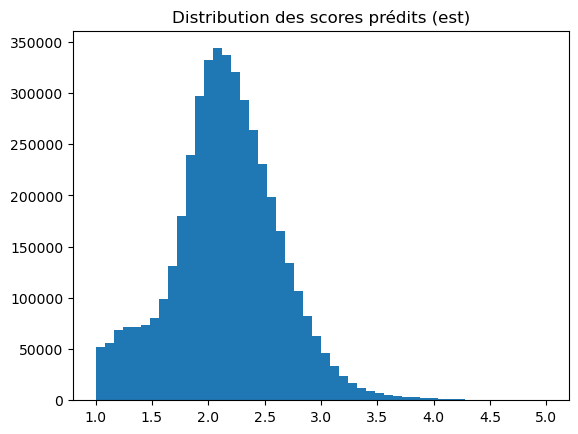

In [ ]:
import matplotlib.pyplot as plt
plt.hist([pred.est for pred in predictions], bins=50)
plt.title("Distribution des scores prédits (est) - SVD")
plt.show()


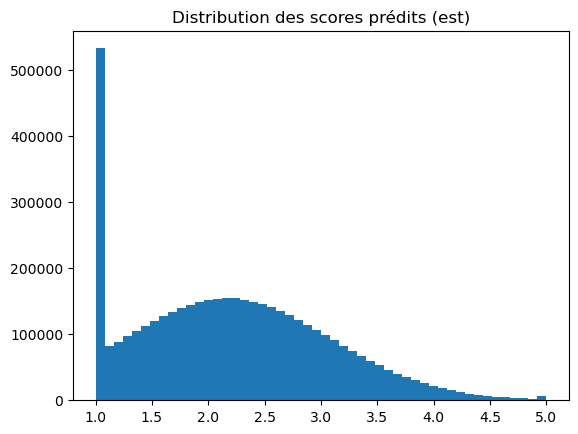

In [ ]:
import matplotlib.pyplot as plt
plt.hist([pred.est for pred in predictions_baseline], bins=50)
plt.title("Distribution des scores prédits (est) - Baseline Random")
plt.show()


# Conclusion

Nous avons conçu un système de recommandation basé sur le filtrage collaboratif en exploitant le dataset KuaiRec, riche en interactions, métadonnées et signaux temporels. Le modèle SVD s’est révélé performant en termes de précision, classement et pertinence, surpassant largement les baselines aléatoires.

Malgré cela, le modèle reste limité en couverture, favorisant les vidéos les plus populaires. Il maintient toutefois une bonne diversité et nouveauté, qualités importantes pour la recommandation de contenus courts.